In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
weights_t = np.load('/fastio2/dasha/double_pulse/weights_NuTau.npy', mmap_mode='r')
weights_m = np.load('/fastio2/dasha/double_pulse/weights_NuMu.npy', mmap_mode='r')
weights_e = np.load('/fastio2/dasha/double_pulse/weights_NuE.npy', mmap_mode='r')

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0.5, 0, 'log10($E_{\\nu}$/ GeV)')

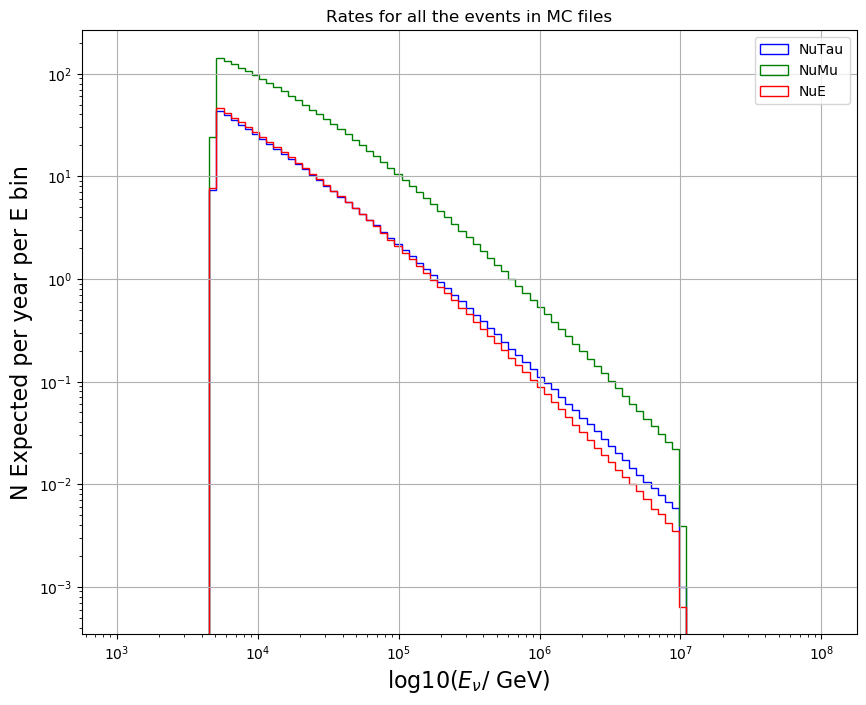

In [21]:
fig = plt.figure(dpi=100, figsize=(10,8))
plt.title('Rates for all the events in MC files')

# ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)
# plt.hist((weights_t['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_t*livetime, histtype='step', color = 'b', label = "all_tau")
# plt.hist((weights_m['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_m*livetime, histtype='step', color = 'g', label = "all_mu")
# plt.hist((weights_e['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_e*livetime, histtype='step', color = 'r', label = "all_e")
# plt.legend()

# plt.grid(True)
# plt.xscale('log')
# plt.ylabel('#Events expected per year, per E bin', size=12)
# plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)

ax=fig.add_subplot(111)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((weights_t['weight']['PrimaryNeutrinoEnergy'][mask_t]), bins=bins,weights=w_weights_t[mask_t]*livetime, histtype='step', color = 'b', label = "NuTau")
plt.hist((weights_m['weight']['PrimaryNeutrinoEnergy'][mask_m]), bins=bins,weights=w_weights_m[mask_m]*livetime, histtype='step', color = 'g', label = "NuMu")
plt.hist((weights_e['weight']['PrimaryNeutrinoEnergy'][mask_e]), bins=bins,weights=w_weights_e[mask_e]*livetime, histtype='step', color = 'r', label = "NuE")
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=16)
plt.xlabel(r'log10($E_{\nu}$/ GeV)', size=16)

In [18]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1

w_flux_t = flux_at_100tev*((weights_t['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
w_flux_m = flux_at_100tev*((weights_m['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
w_flux_e = flux_at_100tev*((weights_e['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

# one weights has units of [GeV cm2 sr / Number of total simulated events]
w_weights_t = weights_t['weight']['OneWeight']*w_flux_t/(NFiles_all*weights_t['weight']["NEvents"]) # units of Hz per simulated events event
w_weights_m = weights_m['weight']['OneWeight']*w_flux_m/(NFiles_all*weights_m['weight']["NEvents"]) # units of Hz per simulated events event
w_weights_e = weights_e['weight']['OneWeight']*w_flux_e/(NFiles_all*weights_e['weight']["NEvents"]) # units of Hz per simulated events event

w_rate_t = np.sum(w_weights_t) # total rates in Hz
w_rate_m = np.sum(w_weights_m) # total rates in Hz
w_rate_e = np.sum(w_weights_e) # total rates in Hz

print("Tau = {0:.3f}".format(w_rate_t*livetime))
print("Mu = {0:.3f}".format(w_rate_m*livetime))
print("E = {0:.3f}".format(w_rate_e*livetime))

Tau = 531.682
Mu = 1718.237
E = 544.420


In [55]:
def FindVertex(data):
    mask = []
    for i in data:
        spos = np.zeros(3)
        pos = i['neutrino']['position'][0]
        di = i['neutrino']['direction'][0]
        leng = i['neutrino']['length']
        
        spos[0] = pos[0]-np.sin(di[0])*np.cos(di[1])*leng
        spos[1] = pos[1]-np.sin(di[0])*np.sin(di[1])*leng
        spos[2] = pos[2]-np.cos(di[0])*leng
        
        if np.all(spos < 500, axis =0) and np.all(spos > -500, axis =0):
            mask.append(True)
        else:
            mask.append(False)
    
    mask= np.array(mask)
    return mask

In [56]:
w_mask_t = FindVertex(weights_t)
w_mask_m = FindVertex(weights_m)
w_mask_e = FindVertex(weights_e)
print(w_mask_t.shape,w_mask_t[0])
print(w_mask_e.shape,w_mask_e[0])
print(w_mask_m.shape,w_mask_m[0])

(6374299,) False
(16971649,) False
(33647672,) False


In [67]:
w_mask_t= w_mask_t.reshape((w_mask_t.shape[0],1))
w_mask_m= w_mask_m.reshape((w_mask_m.shape[0],1))
w_mask_e= w_mask_e.reshape((w_mask_e.shape[0],1))

In [101]:
tmask_tc = weights_t['weight']['InteractionType'] ==1
tmask_mc = weights_m['weight']['InteractionType'] ==1
tmask_ec = weights_e['weight']['InteractionType'] ==1
tmask_tn = weights_t['weight']['InteractionType'] ==2
tmask_mn = weights_m['weight']['InteractionType'] ==2
tmask_en = weights_e['weight']['InteractionType'] ==2
tmask_eg = weights_e['weight']['InteractionType'] ==3

emask_t = weights_t['weight']['PrimaryNeutrinoEnergy'] >100000
emask_m = weights_m['weight']['PrimaryNeutrinoEnergy'] >100000
emask_e = weights_e['weight']['PrimaryNeutrinoEnergy'] >100000


temask_tc = tmask_tc & emask_t
temask_mc = tmask_mc & emask_m
temask_ec = tmask_ec & emask_e
temask_tn = tmask_tn & emask_t
temask_mn = tmask_mn & emask_m
temask_en = tmask_en & emask_e
temask_eg = tmask_eg & emask_e

wtemask_tc = tmask_tc & emask_t & w_mask_t
wtemask_mc = tmask_mc & emask_m & w_mask_m
wtemask_ec = tmask_ec & emask_e & w_mask_e
wtemask_tn = tmask_tn & emask_t & w_mask_t
wtemask_mn = tmask_mn & emask_m & w_mask_m
wtemask_en = tmask_en & emask_e & w_mask_e
wtemask_eg = tmask_eg & emask_e & w_mask_e

w_t_rate_tc = np.sum(w_weights_t[tmask_tc]) # total rates in Hz
w_t_rate_mc = np.sum(w_weights_m[tmask_mc]) # total rates in Hz
w_t_rate_ec = np.sum(w_weights_e[tmask_ec]) # total rates in Hz
w_t_rate_tn = np.sum(w_weights_t[tmask_tn]) # total rates in Hz
w_t_rate_mn = np.sum(w_weights_m[tmask_mn]) # total rates in Hz
w_t_rate_en = np.sum(w_weights_e[tmask_en]) # total rates in Hz
w_t_rate_eg = np.sum(w_weights_e[tmask_eg]) # total rates in Hz

w_t_rate_tc_err = np.sqrt(np.sum(np.square(w_weights_t[tmask_tc]))) # total rates in Hz
w_t_rate_mc_err = np.sqrt(np.sum(np.square(w_weights_m[tmask_mc]))) # total rates in Hz
w_t_rate_ec_err = np.sqrt(np.sum(np.square(w_weights_e[tmask_ec]))) # total rates in Hz
w_t_rate_tn_err = np.sqrt(np.sum(np.square(w_weights_t[tmask_tn]))) # total rates in Hz
w_t_rate_mn_err = np.sqrt(np.sum(np.square(w_weights_m[tmask_mn]))) # total rates in Hz
w_t_rate_en_err = np.sqrt(np.sum(np.square(w_weights_e[tmask_en]))) # total rates in Hz
w_t_rate_eg_err = np.sqrt(np.sum(np.square(w_weights_e[tmask_eg]))) # total rates in Hz

w_e_rate_t = np.sum(w_weights_t[emask_t]) # total rates in Hz
w_e_rate_m = np.sum(w_weights_m[emask_m]) # total rates in Hz
w_e_rate_e = np.sum(w_weights_e[emask_e]) # total rates in Hz

w_te_rate_tc = np.sum(w_weights_t[temask_tc]) # total rates in Hz
w_te_rate_mc = np.sum(w_weights_m[temask_mc]) # total rates in Hz
w_te_rate_ec = np.sum(w_weights_e[temask_ec]) # total rates in Hz
w_te_rate_tn = np.sum(w_weights_t[temask_tn]) # total rates in Hz
w_te_rate_mn = np.sum(w_weights_m[temask_mn]) # total rates in Hz
w_te_rate_en = np.sum(w_weights_e[temask_en]) # total rates in Hz
w_te_rate_eg = np.sum(w_weights_e[temask_eg]) # total rates in Hz

w_wte_rate_tc = np.sum(w_weights_t[wtemask_tc]) # total rates in Hz
w_wte_rate_mc = np.sum(w_weights_m[wtemask_mc]) # total rates in Hz
w_wte_rate_ec = np.sum(w_weights_e[wtemask_ec]) # total rates in Hz
w_wte_rate_tn = np.sum(w_weights_t[wtemask_tn]) # total rates in Hz
w_wte_rate_mn = np.sum(w_weights_m[wtemask_mn]) # total rates in Hz
w_wte_rate_en = np.sum(w_weights_e[wtemask_en]) # total rates in Hz
w_wte_rate_eg = np.sum(w_weights_e[wtemask_eg]) # total rates in Hz


print("TauCC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tc*livetime, w_e_rate_t*livetime, w_te_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mc*livetime, w_e_rate_m*livetime, w_te_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_ec*livetime, w_e_rate_e*livetime, w_te_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tn*livetime, w_e_rate_t*livetime, w_te_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mn*livetime, w_e_rate_m*livetime, w_te_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_en*livetime, w_e_rate_e*livetime, w_te_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_eg*livetime, w_e_rate_e*livetime, w_te_rate_eg*livetime))#,w_rate_e*livetime)
print('aaa')
print("TauCC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tc*livetime, w_e_rate_t*livetime, w_wte_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mc*livetime, w_e_rate_m*livetime, w_wte_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_ec*livetime, w_e_rate_e*livetime, w_wte_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tn*livetime, w_e_rate_t*livetime, w_wte_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mn*livetime, w_e_rate_m*livetime, w_wte_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_en*livetime, w_e_rate_e*livetime, w_wte_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_eg*livetime, w_e_rate_e*livetime, w_wte_rate_eg*livetime))#,w_rate_e*livetime)
print("aaa")
print("Single = {0:.3f} || {1:.3f} || {2:.3f}".format((w_t_rate_ec+w_t_rate_eg+w_t_rate_en+w_t_rate_tn+w_t_rate_mn)*livetime, (w_t_rate_ec+w_t_rate_eg+w_t_rate_en+w_t_rate_tn+w_t_rate_mn)*livetime, (w_te_rate_ec+w_te_rate_eg+w_te_rate_en+w_te_rate_tn+w_te_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tc*livetime, w_e_rate_t*livetime, w_te_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mc*livetime, w_e_rate_m*livetime, w_te_rate_mc*livetime))#,w_rate_m*livetime)

print("TauCC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tc*livetime, w_t_rate_tc_err*livetime, w_te_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mc*livetime, w_t_rate_mc_err*livetime, w_te_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_ec*livetime, w_t_rate_ec_err*livetime, w_te_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tn*livetime, w_t_rate_tn_err*livetime, w_te_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mn*livetime, w_t_rate_mn_err*livetime, w_te_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_en*livetime, w_t_rate_en_err*livetime, w_te_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_eg*livetime, w_t_rate_eg_err*livetime, w_te_rate_eg*livetime))#,w_rate_e*livetime)
print('aaa')
print("TauCC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tc*livetime, w_e_rate_t*livetime, w_wte_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mc*livetime, w_e_rate_m*livetime, w_wte_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_ec*livetime, w_e_rate_e*livetime, w_wte_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tn*livetime, w_e_rate_t*livetime, w_wte_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mn*livetime, w_e_rate_m*livetime, w_wte_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_en*livetime, w_e_rate_e*livetime, w_wte_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_eg*livetime, w_e_rate_e*livetime, w_wte_rate_eg*livetime))#,w_rate_e*livetime)
print("aaa")
print("Single = {0:.3f} || {1:.3f} || {2:.3f}".format((w_t_rate_ec+w_t_rate_eg+w_t_rate_en+w_t_rate_tn+w_t_rate_mn)*livetime, (w_t_rate_ec_err+w_t_rate_eg_err+w_t_rate_en_err+w_t_rate_tn_err+w_t_rate_mn_err)*livetime, (w_te_rate_ec+w_te_rate_eg+w_te_rate_en+w_te_rate_tn+w_te_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_tc*livetime, w_t_rate_tc_err*livetime, w_te_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f} || {1:.3f} || {2:.3f}".format(w_t_rate_mc*livetime, w_t_rate_mc_err*livetime, w_te_rate_mc*livetime))#,w_rate_m*livetime)
#w_rate_t = np.sum(w_weights_t[mask_tc]) # total rates in Hz
#w_rate_m = np.sum(w_weights_m[mask_mc]) # total rates in Hz
#w_rate_e = np.sum(w_weights_e[mask_ec]) # total rates in Hz

#print("Tau = {0:.3f}".format(w_rate_t*livetime))
#print("Mu = {0:.3f}".format(w_rate_m*livetime))
#print("E = {0:.3f}".format(w_rate_e*livetime))

TauCC = 414.801 || 19.286 || 14.904
MuCC =  1603.481 || 76.216 || 72.190
ECC =   428.445 || 17.873 || 13.286
TauNC = 116.875 || 19.286 || 4.380
MuNC =  114.756 || 76.216 || 4.026
ENC =   113.517 || 17.873 || 3.977
EGR =   2.458 || 17.873 || 0.610
aaa
TauCC = 414.801 || 19.286 || 5.263
MuCC =  1603.481 || 76.216 || 5.229
ECC =   428.445 || 17.873 || 5.184
TauNC = 116.875 || 19.286 || 1.873
MuNC =  114.756 || 76.216 || 1.870
ENC =   113.517 || 17.873 || 1.832
EGR =   2.458 || 17.873 || 0.166
aaa
Single = 776.051 || 776.051 || 26.279
Double = 414.801 || 19.286 || 14.904
Track =  1603.481 || 76.216 || 72.190
TauCC = 414.801 || 0.278 || 14.904
MuCC =  1603.481 || 0.406 || 72.190
ECC =   428.445 || 0.189 || 13.286
TauNC = 116.875 || 0.147 || 4.380
MuNC =  114.756 || 0.103 || 4.026
ENC =   113.517 || 0.097 || 3.977
EGR =   2.458 || 0.017 || 0.610
aaa
TauCC = 414.801 || 19.286 || 5.263
MuCC =  1603.481 || 76.216 || 5.229
ECC =   428.445 || 17.873 || 5.184
TauNC = 116.875 || 19.286 || 1.873
MuN

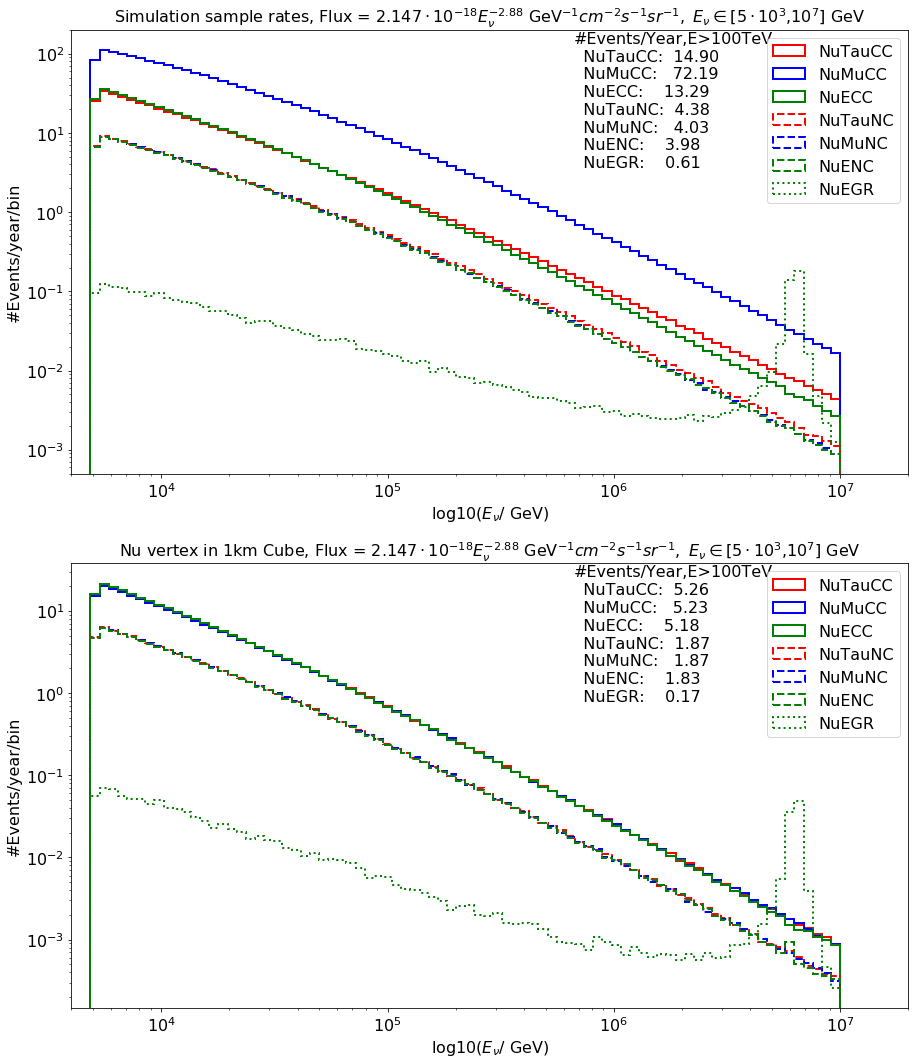

In [74]:
fig = plt.figure(figsize=(15, 18),facecolor = "w")
ax = fig.add_subplot(211)
plt.rcParams.update({'font.size': 16})
bins = np.logspace(3, 7, 100)

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([4000,20000000])

ax.set_title(r'Simulation sample rates, Flux = $2.147\cdot10^{-18}E^{-2.88}_{\nu}$ GeV$^{-1}cm^{-2}s^{-1}sr^{-1},\ E_{\nu}\in[5\cdot10^{3}$,$10^{7}]$ GeV', fontsize = 16)
ax.text(0.6,0.97,'#Events/Year,E>100TeV', transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.93,'  NuTauCC:  {0:.2f}       '.format(w_te_rate_tc*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.89,'  NuMuCC:   {0:.2f}       '.format(w_te_rate_mc*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.85,'  NuECC:    {0:.2f}       '.format(w_te_rate_ec*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.81,'  NuTauNC:  {0:.2f}       '.format(w_te_rate_tn*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.77,'  NuMuNC:   {0:.2f}       '.format(w_te_rate_mn*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.73,'  NuENC:    {0:.2f}       '.format(w_te_rate_en*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.69,'  NuEGR:    {0:.2f}       '.format(w_te_rate_eg*livetime), transform=ax.transAxes, color = "black",fontsize=16)

ax.set_xlabel(r'log10($E_{\nu}$/ GeV)', fontsize = 16)                                                              
ax.set_ylabel('#Events/year/bin', fontsize = 16)                                                   
ax.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tc], bins = bins, weights=w_weights_t[tmask_tc]*livetime, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mc], bins = bins, weights=w_weights_m[tmask_mc]*livetime, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_ec], bins = bins, weights=w_weights_e[tmask_ec]*livetime, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tn], bins = bins, weights=w_weights_t[tmask_tn]*livetime, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC")  
ax.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mn], bins = bins, weights=w_weights_m[tmask_mn]*livetime, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC")  
ax.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_en], bins = bins, weights=w_weights_e[tmask_en]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC")  
ax.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_eg], bins = bins, weights=w_weights_e[tmask_eg]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls =":", label = "NuEGR")  
ax.legend()

ax2 = fig.add_subplot(212)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([4000,20000000])

ax2.set_title(r'Nu vertex in 1km Cube, Flux = $2.147\cdot10^{-18}E^{-2.88}_{\nu}$ GeV$^{-1}cm^{-2}s^{-1}sr^{-1},\ E_{\nu}\in[5\cdot10^{3}$,$10^{7}]$ GeV', fontsize = 16)
ax2.text(0.6,0.97,'#Events/Year,E>100TeV', transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.93,'  NuTauCC:  {0:.2f}       '.format(w_wte_rate_tc*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.89,'  NuMuCC:   {0:.2f}       '.format(w_wte_rate_mc*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.85,'  NuECC:    {0:.2f}       '.format(w_wte_rate_ec*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.81,'  NuTauNC:  {0:.2f}       '.format(w_wte_rate_tn*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.77,'  NuMuNC:   {0:.2f}       '.format(w_wte_rate_mn*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.73,'  NuENC:    {0:.2f}       '.format(w_wte_rate_en*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.69,'  NuEGR:    {0:.2f}       '.format(w_wte_rate_eg*livetime), transform=ax2.transAxes, color = "black",fontsize=16)

ax2.set_xlabel(r'log10($E_{\nu}$/ GeV)', fontsize = 16)                                                              
ax2.set_ylabel('#Events/year/bin', fontsize = 16)                                                   
ax2.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tc & w_mask_t], bins = bins, weights=w_weights_t[tmask_tc & w_mask_t]*livetime, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax2.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mc & w_mask_m], bins = bins, weights=w_weights_m[tmask_mc & w_mask_m]*livetime, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_ec & w_mask_e], bins = bins, weights=w_weights_e[tmask_ec & w_mask_e]*livetime, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax2.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tn & w_mask_t], bins = bins, weights=w_weights_t[tmask_tn & w_mask_t]*livetime, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC")  
ax2.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mn & w_mask_m], bins = bins, weights=w_weights_m[tmask_mn & w_mask_m]*livetime, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC")  
ax2.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_en & w_mask_e], bins = bins, weights=w_weights_e[tmask_en & w_mask_e]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC")  
ax2.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_eg & w_mask_e], bins = bins, weights=w_weights_e[tmask_eg & w_mask_e]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls =":", label = "NuEGR")  

ax2.legend()
plt.show()


In [7]:
emask_t = weights_t['weight']['PrimaryNeutrinoEnergy'] >100000
emask_m = weights_m['weight']['PrimaryNeutrinoEnergy'] >100000
emask_e = weights_e['weight']['PrimaryNeutrinoEnergy'] >100000

w_rate_t = np.sum(w_weights_t[mask_t]) # total rates in Hz
w_rate_m = np.sum(w_weights_m[mask_m]) # total rates in Hz
w_rate_e = np.sum(w_weights_e[mask_e]) # total rates in Hz

print("Tau = {0:.3f}".format(w_rate_t*livetime))
print("Mu = {0:.3f}".format(w_rate_m*livetime))
print("E = {0:.3f}".format(w_rate_e*livetime))

Tau = 19.286
Mu = 76.216
E = 17.873


Text(0.5, 0, 'log10(Muon Energy Proxy / GeV)')

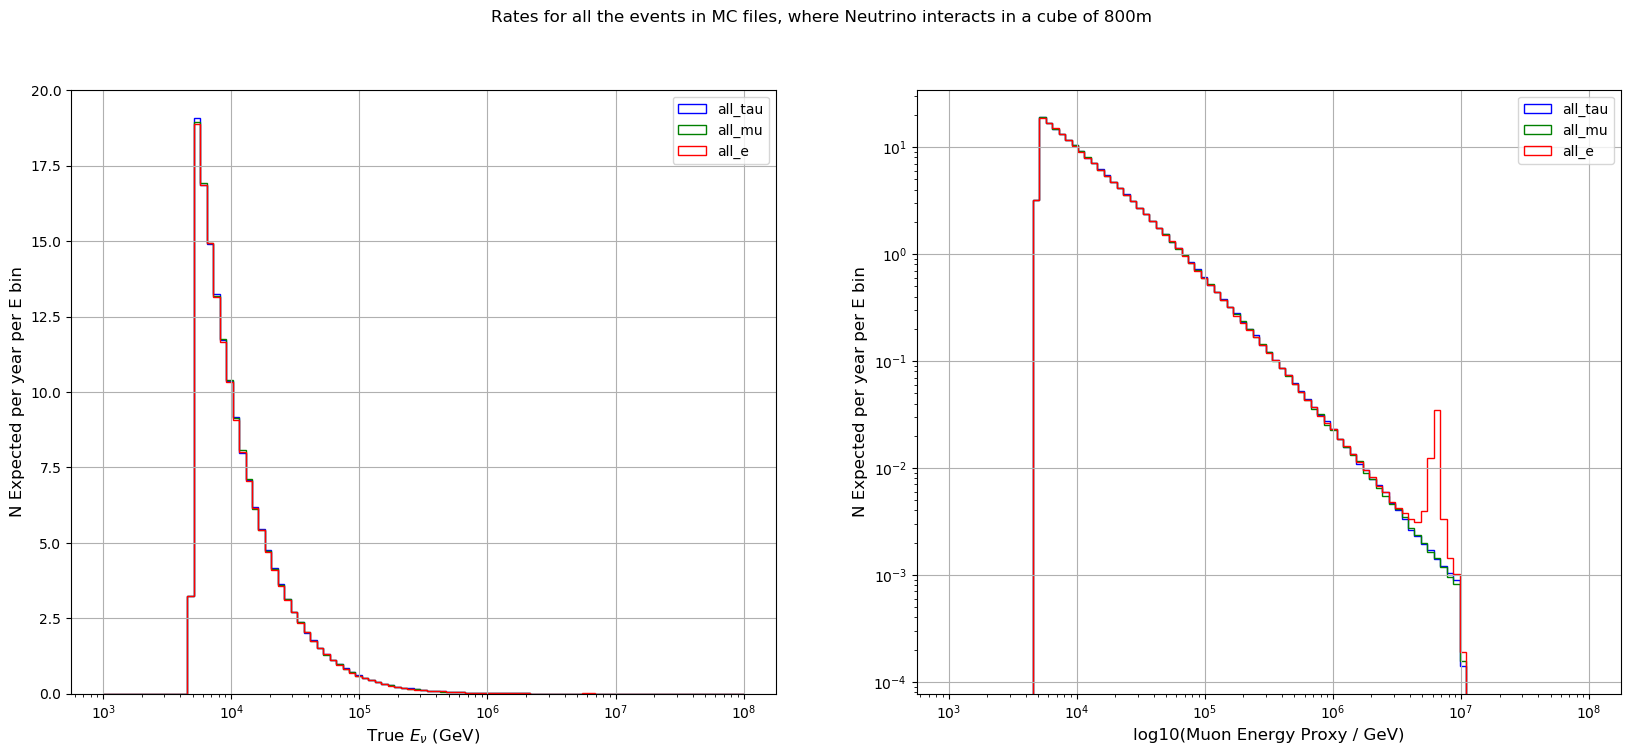

In [19]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Rates for all the events in MC files, where Neutrino interacts in a cube of 800m')

ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)
plt.hist((weights_t[w_mask_t]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_t[w_mask_t]*livetime, histtype='step', color = 'b', label = "all_tau")
plt.hist((weights_m[w_mask_m]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_m[w_mask_m]*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((weights_e[w_mask_e]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_e[w_mask_e]*livetime, histtype='step', color = 'r', label = "all_e")
plt.legend()

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((weights_t[w_mask_t]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_t[w_mask_t]*livetime, histtype='step', color = 'b', label = "all_tau")
plt.hist((weights_m[w_mask_m]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_m[w_mask_m]*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((weights_e[w_mask_e]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=w_weights_e[w_mask_e]*livetime, histtype='step', color = 'r', label = "all_e")
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)

In [59]:
print(weights_t['neutrino']['direction'][:,0][:,0].shape,weights_t['neutrino']['direction'][:,0][:,0][0])
print(weights_t['weight']['PrimaryNeutrinoEnergy'][:,0].shape,weights_t['weight']['PrimaryNeutrinoEnergy'][:,0][0])
print(weights_t.shape,weights_t[0])

(6374299,) 1.7301265
(6374299,) 10549.68
(6374299, 1) [6.41856507e-12]


In [80]:
w_mask_500 = weights_t['weight']['PrimaryNeutrinoEnergy'] >500000
w_mask_1000 = weights_t['weight']['PrimaryNeutrinoEnergy'] >1000000
w_mask_5000 = weights_t['weight']['PrimaryNeutrinoEnergy'] >5000000

Text(0.5, 0, 'zenith')

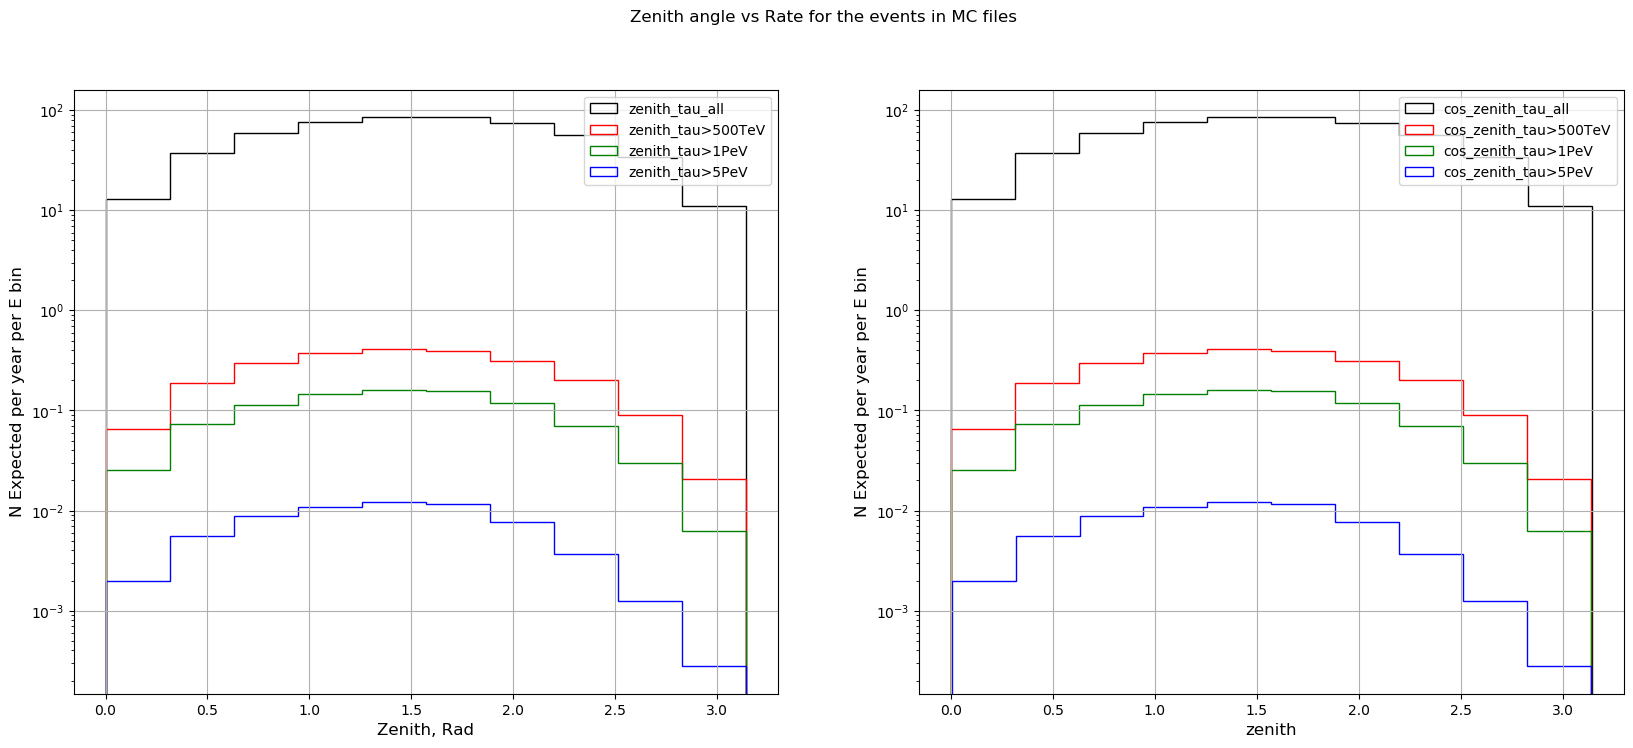

In [84]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Zenith angle vs Rate for the events in MC files')

ax=fig.add_subplot(121)
#ins = np.logspace(3, 8, 100)
plt.hist((weights_t['neutrino']['direction'][:,0][:,0]),weights=w_weights_t*livetime, histtype='step', color = 'k', label = "zenith_tau_all")
plt.hist((weights_t[w_mask_500]['neutrino']['direction'][:,0]),weights=w_weights_t[w_mask_500]*livetime, histtype='step', color = 'r', label = "zenith_tau>500TeV")
plt.hist((weights_t[w_mask_1000]['neutrino']['direction'][:,0]),weights=w_weights_t[w_mask_1000]*livetime, histtype='step', color = 'g', label = "zenith_tau>1PeV")
plt.hist((weights_t[w_mask_5000]['neutrino']['direction'][:,0]),weights=w_weights_t[w_mask_5000]*livetime, histtype='step', color = 'b', label = "zenith_tau>5PeV")

plt.legend()

plt.grid(True)
plt.yscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('Zenith, Rad', size=12)

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((weights_t['neutrino']['direction'][:,0][:,0]),weights=w_weights_t*livetime, histtype='step', color = 'k', label = "cos_zenith_tau_all")
plt.hist((weights_t[w_mask_500]['neutrino']['direction'][:,0]),weights=w_weights_t[w_mask_500]*livetime, histtype='step', color = 'r', label = "cos_zenith_tau>500TeV")
plt.hist((weights_t[w_mask_1000]['neutrino']['direction'][:,0]),weights=w_weights_t[w_mask_1000]*livetime, histtype='step', color = 'g', label = "cos_zenith_tau>1PeV")
plt.hist((weights_t[w_mask_5000]['neutrino']['direction'][:,0]),weights=w_weights_t[w_mask_5000]*livetime, histtype='step', color = 'b', label = "cos_zenith_tau>5PeV")

plt.legend()
plt.grid(True)
plt.yscale('log')
#plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('zenith', size=12)

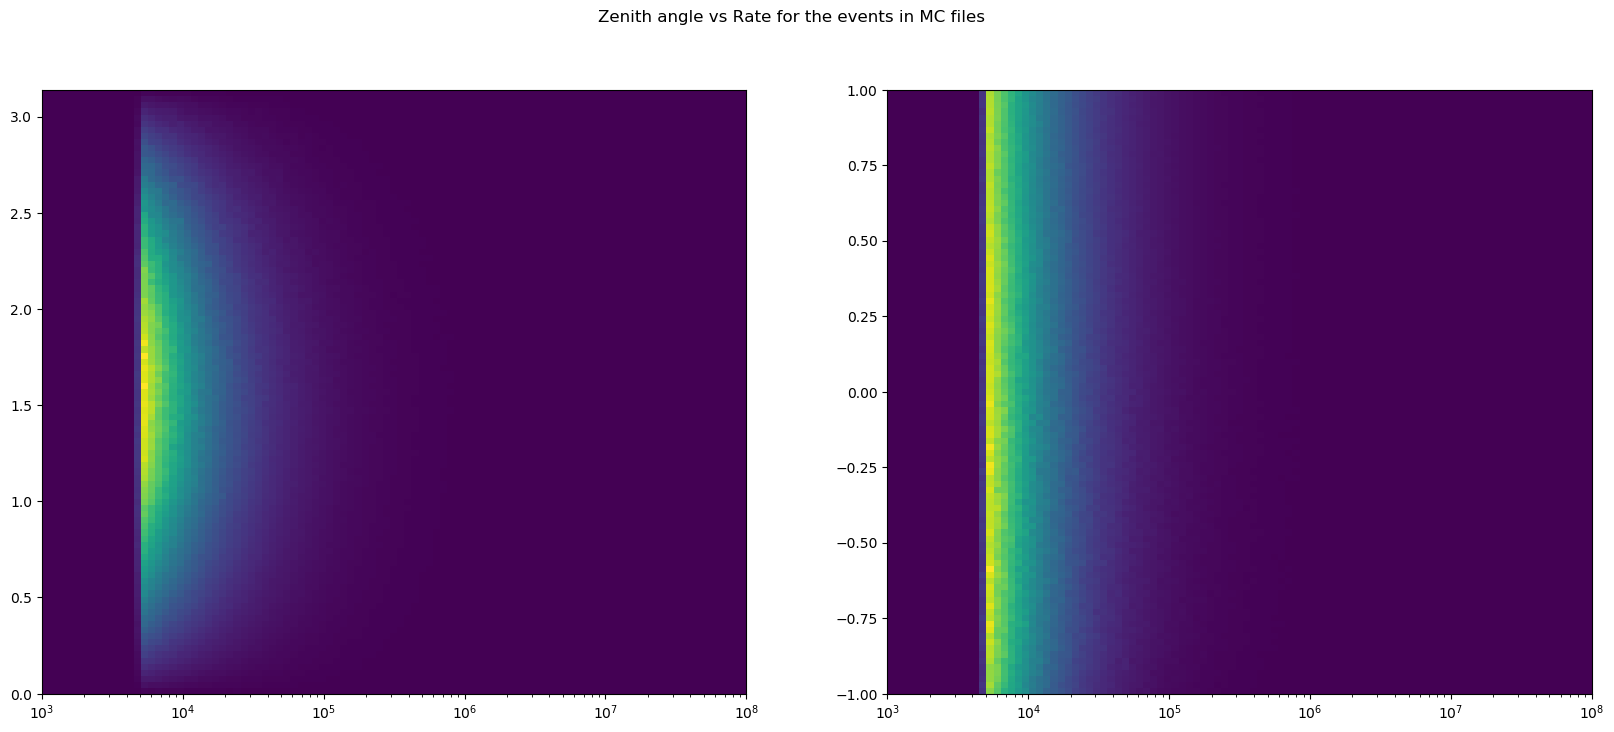

In [91]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Zenith angle vs Rate for the events in MC files')

ax=fig.add_subplot(121)
ybins = np.linspace(0, 3.14, 100)
xbins = np.logspace(3, 8, 100)
counts, _, _ = np.histogram2d(weights_t['weight']['PrimaryNeutrinoEnergy'][:,0], weights_t['neutrino']['direction'][:,0][:,0], weights=w_weights_t[:,0]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


ax=fig.add_subplot(122)
ybins = np.linspace(-1, 1, 100)
xbins = np.logspace(3, 8, 100)

counts, _, _ = np.histogram2d(weights_t['weight']['PrimaryNeutrinoEnergy'][:,0], np.cos(weights_t['neutrino']['direction'][:,0][:,0]), weights=w_weights_t[:,0]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


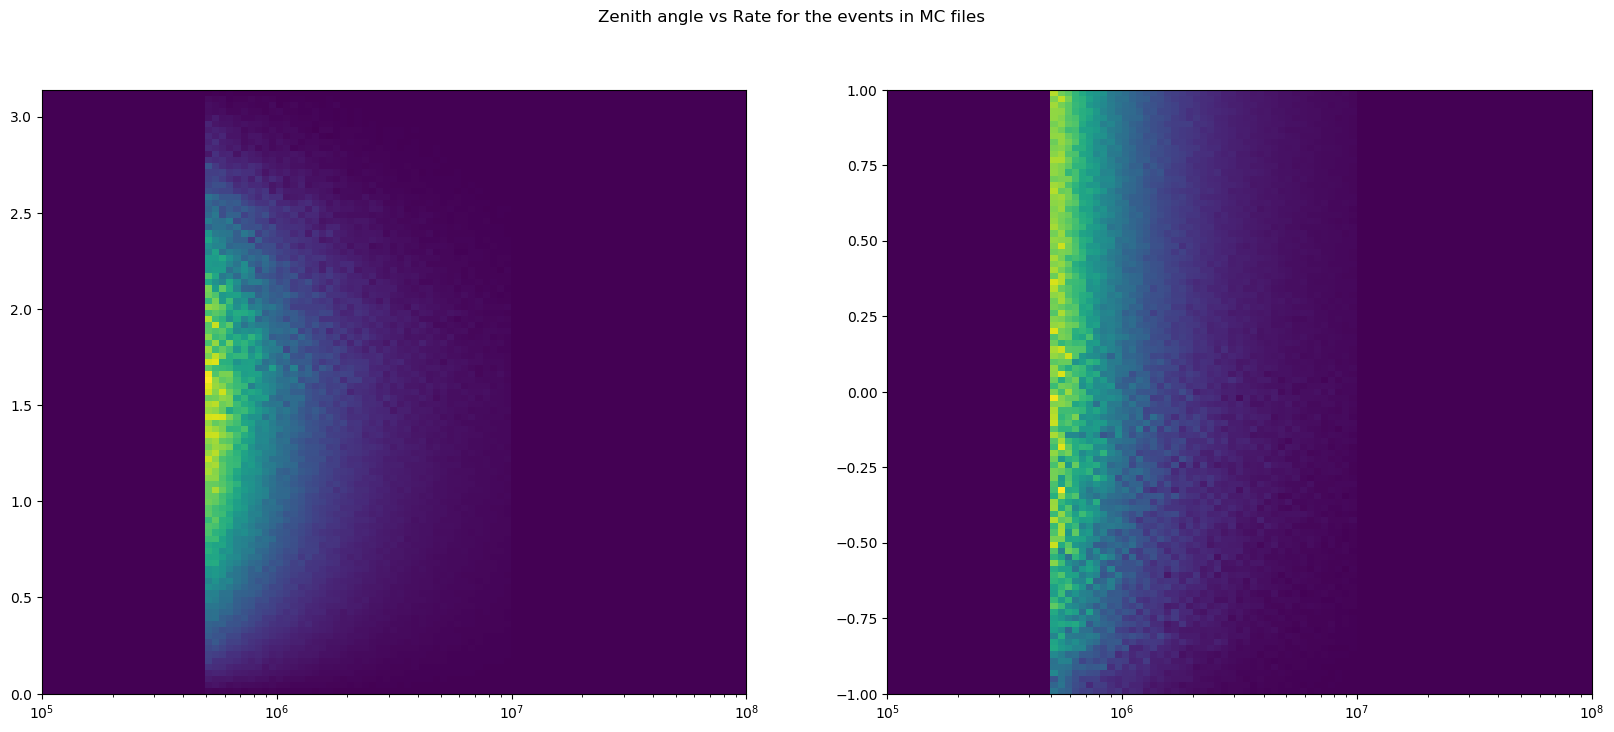

In [89]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Zenith angle vs Rate for the events in MC files')

ax=fig.add_subplot(121)
ybins = np.linspace(0, 3.14, 100)
xbins = np.logspace(5, 8, 100)
counts, _, _ = np.histogram2d(weights_t[w_mask_500]['weight']['PrimaryNeutrinoEnergy'], weights_t[w_mask_500]['neutrino']['direction'][:,0], weights=w_weights_t[w_mask_500]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


ax=fig.add_subplot(122)
ybins = np.linspace(-1, 1, 100)
xbins = np.logspace(5, 8, 100)

counts, _, _ = np.histogram2d(weights_t[w_mask_500]['weight']['PrimaryNeutrinoEnergy'], np.cos(weights_t[w_mask_500]['neutrino']['direction'][:,0]), weights=w_weights_t[w_mask_500]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


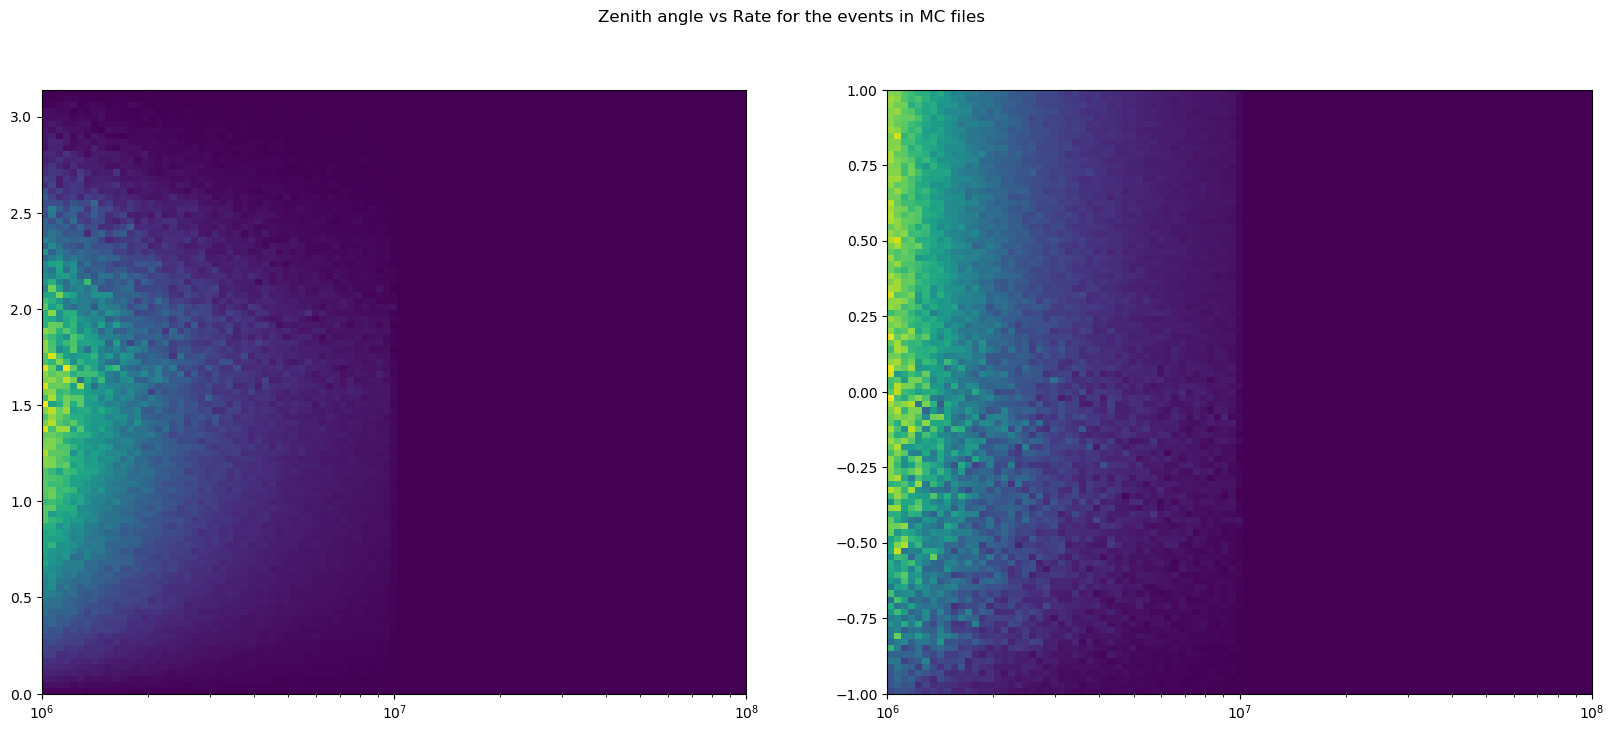

In [93]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Zenith angle vs Rate for the events in MC files')

ax=fig.add_subplot(121)
ybins = np.linspace(0, 3.14, 100)
xbins = np.logspace(6, 8, 100)
counts, _, _ = np.histogram2d(weights_t[w_mask_1000]['weight']['PrimaryNeutrinoEnergy'], weights_t[w_mask_1000]['neutrino']['direction'][:,0], weights=w_weights_t[w_mask_1000]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


ax=fig.add_subplot(122)
ybins = np.linspace(-1, 1, 100)
xbins = np.logspace(6, 8, 100)

counts, _, _ = np.histogram2d(weights_t[w_mask_1000]['weight']['PrimaryNeutrinoEnergy'], np.cos(weights_t[w_mask_1000]['neutrino']['direction'][:,0]), weights=w_weights_t[w_mask_1000]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


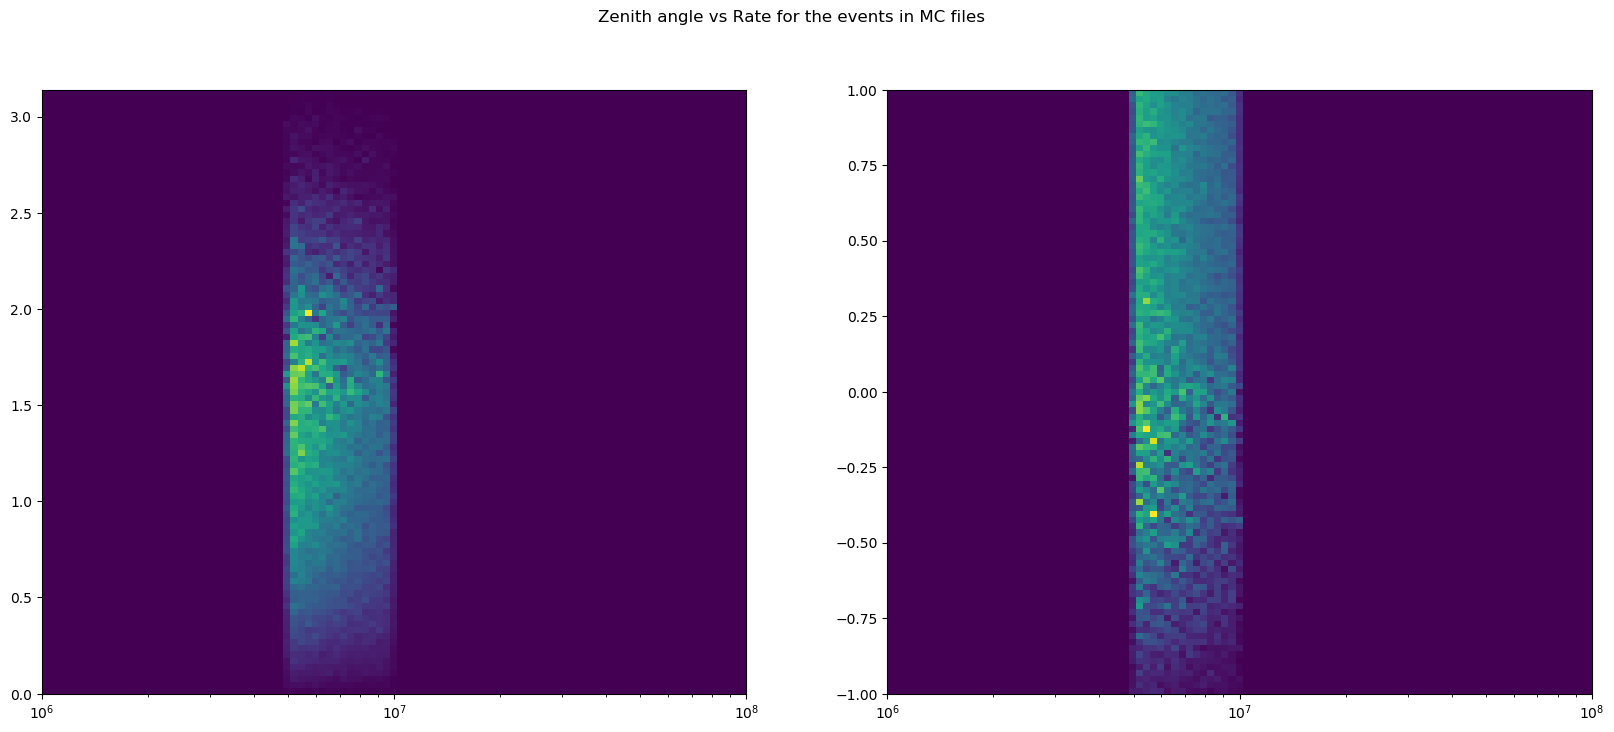

In [94]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Zenith angle vs Rate for the events in MC files')

ax=fig.add_subplot(121)
ybins = np.linspace(0, 3.14, 100)
xbins = np.logspace(6, 8, 100)
counts, _, _ = np.histogram2d(weights_t[w_mask_5000]['weight']['PrimaryNeutrinoEnergy'], weights_t[w_mask_5000]['neutrino']['direction'][:,0], weights=w_weights_t[w_mask_5000]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


ax=fig.add_subplot(122)
ybins = np.linspace(-1, 1, 100)
xbins = np.logspace(6, 8, 100)

counts, _, _ = np.histogram2d(weights_t[w_mask_5000]['weight']['PrimaryNeutrinoEnergy'], np.cos(weights_t[w_mask_5000]['neutrino']['direction'][:,0]), weights=w_weights_t[w_mask_5000]*livetime, bins = (xbins,ybins))
ax.pcolormesh(xbins, ybins, counts.T)
ax.set_xscale('log')


Text(0.5, 0, 'Cos Zenith')

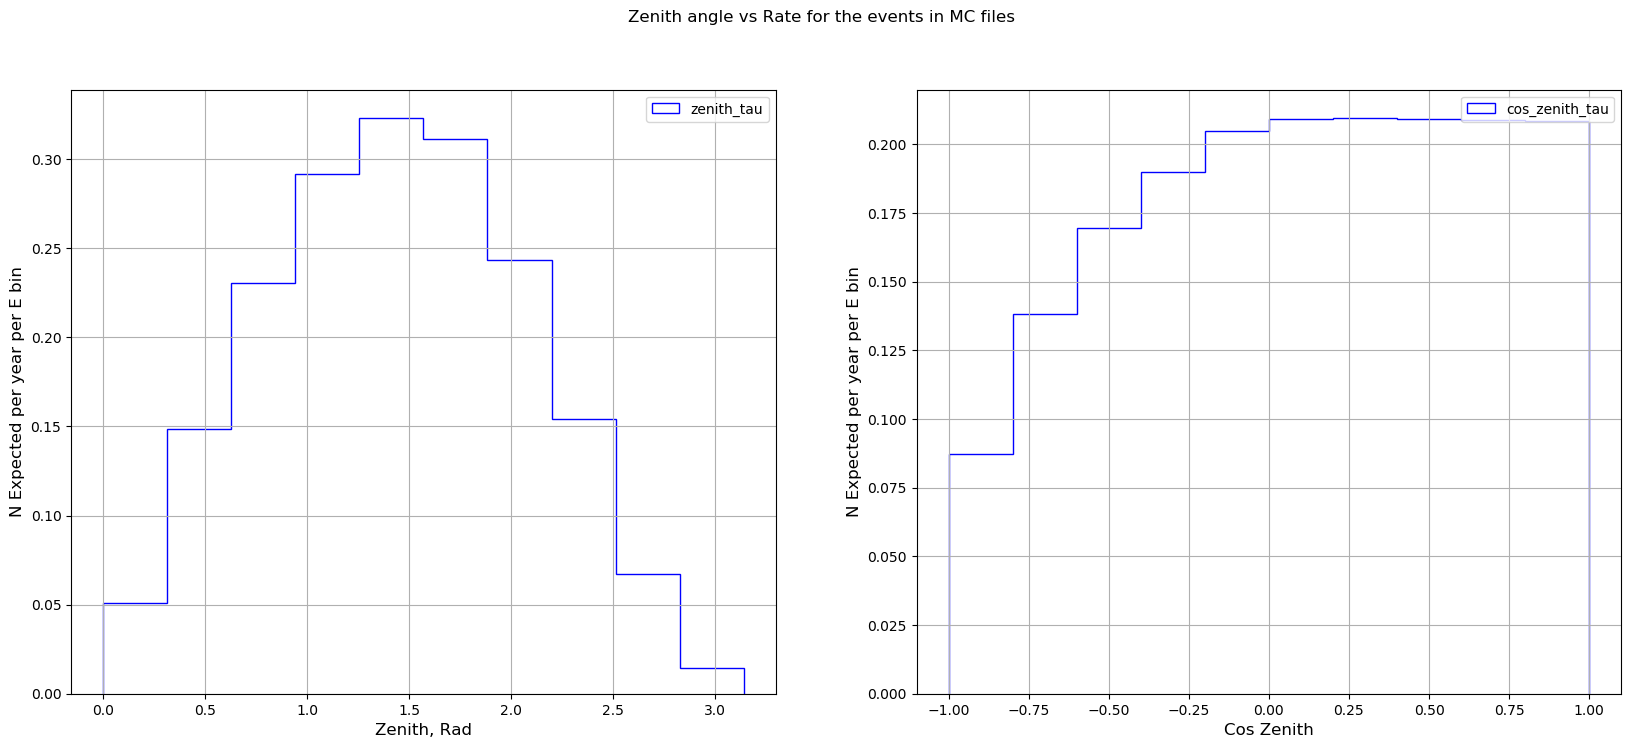

In [77]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Zenith angle vs Rate for the events in MC files')

ax=fig.add_subplot(121)
#ins = np.logspace(3, 8, 100)
plt.hist(weights_t[w_mask_t_eng]['neutrino']['direction'][:,0],weights=w_weights_t[w_mask_t_eng]*livetime, histtype='step', color = 'b', label = "zenith_tau")
plt.legend()

plt.grid(True)
#lt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('Zenith, Rad', size=12)

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist(np.cos(weights_t[w_mask_t_eng]['neutrino']['direction'][:,0]),weights=w_weights_t[w_mask_t_eng]*livetime, histtype='step', color = 'b', label = "cos_zenith_tau")
plt.legend()
plt.grid(True)
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('Cos Zenith', size=12)

In [111]:
data_tc = np.load('/fastio2/dasha/double_pulse/data_NuTauCC.npy', mmap_mode='r')
data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTauNC.npy', mmap_mode='r')
data_mc = np.load('/fastio2/dasha/double_pulse/data_NuMuCC.npy', mmap_mode='r')
data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMuNC.npy', mmap_mode='r')
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC.npy', mmap_mode='r')
data_en = np.load('/fastio2/dasha/double_pulse/data_NuENC.npy', mmap_mode='r')
data_eg = np.load('/fastio2/dasha/double_pulse/data_NuEGR.npy', mmap_mode='r')
print(data_tc.shape)
print(data_tn.shape)
print(data_mc.shape)
print(data_mn.shape)
print(data_ec.shape)
print(data_en.shape)
print(data_eg.shape)


(1486806, 1)
(283320, 1)
(1652927, 1)
(564278, 1)
(1523801, 1)
(755078, 1)
(49617, 1)


In [96]:
preds_tc = np.load('/fastio2/dasha/double_pulse/preds_NuTauCC_400_Q2000_NO.npy')
preds_mc = np.load('/fastio2/dasha/double_pulse/preds_NuMuCC_400_Q2000_NO.npy')
preds_ec = np.load('/fastio2/dasha/double_pulse/preds_NuECC_400_Q2000_NO.npy')
preds_tn = np.load('/fastio2/dasha/double_pulse/preds_NuTauNC_400_Q2000_NO.npy')
preds_mn = np.load('/fastio2/dasha/double_pulse/preds_NuMuNC_400_Q2000_NO.npy')
preds_en = np.load('/fastio2/dasha/double_pulse/preds_NuENC_400_Q2000_NO.npy')
preds_eg = np.load('/fastio2/dasha/double_pulse/preds_NuEGR_400_Q2000_NO.npy')
print(preds_tc.shape)
print(preds_tn.shape)
print(preds_mc.shape)
print(preds_mn.shape)
print(preds_ec.shape)
print(preds_en.shape)
print(preds_eg.shape)


(1486806, 2)
(283320, 2)
(1652927, 2)
(564278, 2)
(1523801, 2)
(755078, 2)
(49617, 2)


In [97]:
pmask_tc= preds_tc[:,0] >= 0.99
pmask_tn= preds_tn[:,0] >= 0.99
pmask_mc= preds_mc[:,0] >= 0.99
pmask_mn= preds_mn[:,0] >= 0.99
pmask_ec= preds_ec[:,0] >= 0.99
pmask_en= preds_en[:,0] >= 0.99
pmask_eg= preds_eg[:,0] >= 0.99

In [102]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_tc = flux_at_100tev*((data_tc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_tn = flux_at_100tev*((data_tn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mc = flux_at_100tev*((data_mc['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mn = flux_at_100tev*((data_mn['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_ec = flux_at_100tev*((data_ec['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_en = flux_at_100tev*((data_en['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_eg = flux_at_100tev*((data_eg['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

d_weights_tc = data_tc['weight']['OneWeight']*d_flux_tc/(NFiles_all*data_tc["weight"]["NEvents"]) # units of Hz per simulated events event
d_weights_tn = data_tn['weight']['OneWeight']*d_flux_tn/(NFiles_all*data_tn['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_mc = data_mc['weight']['OneWeight']*d_flux_mc/(NFiles_cut*data_mc['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_mn = data_mn['weight']['OneWeight']*d_flux_mn/(NFiles_all*data_mn['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_ec = data_ec['weight']['OneWeight']*d_flux_ec/(NFiles_cut*data_ec['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_en = data_en['weight']['OneWeight']*d_flux_en/(NFiles_all*data_en['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_eg = data_eg['weight']['OneWeight']*d_flux_eg/(NFiles_all*data_eg['weight']["NEvents"]) # units of Hz per simulated events event


d_rate_tc = np.sum(d_weights_tc) # total rates in Hz
d_rate_tn = np.sum(d_weights_tn) # total rates in Hz
d_rate_mc = np.sum(d_weights_mc) # total rates in Hz
d_rate_mn = np.sum(d_weights_mn) # total rates in Hz
d_rate_ec = np.sum(d_weights_ec) # total rates in Hz
d_rate_en = np.sum(d_weights_en) # total rates in Hz
d_rate_eg = np.sum(d_weights_eg) # total rates in Hz
d_rate_tc_err = np.sqrt(np.sum(np.square(d_weights_tc))) # total rates in Hz
d_rate_mc_err = np.sqrt(np.sum(np.square(d_weights_mc))) # total rates in Hz
d_rate_ec_err = np.sqrt(np.sum(np.square(d_weights_ec))) # total rates in Hz
d_rate_tn_err = np.sqrt(np.sum(np.square(d_weights_tn))) # total rates in Hz
d_rate_mn_err = np.sqrt(np.sum(np.square(d_weights_mn))) # total rates in Hz
d_rate_en_err = np.sqrt(np.sum(np.square(d_weights_en))) # total rates in Hz
d_rate_eg_err = np.sqrt(np.sum(np.square(d_weights_eg))) # total rates in Hz



print("TauCC = {0:.3f} || {1:.3f}".format(d_rate_tc*livetime,d_rate_tc_err*livetime))#,w_rate_t*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(d_rate_tn*livetime,d_rate_tn_err*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(d_rate_mc*livetime,d_rate_mc_err*livetime))#,w_rate_m*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(d_rate_mn*livetime,d_rate_mn_err*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(d_rate_ec*livetime,d_rate_ec_err*livetime))#,w_rate_e*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(d_rate_en*livetime,d_rate_en_err*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(d_rate_eg*livetime,d_rate_eg_err*livetime))#,w_rate_e*livetime)
print("Single = {0:.3f}|| {1:.3f}".format((d_rate_ec+d_rate_eg+d_rate_en+d_rate_tn+d_rate_mn)*livetime,(d_rate_ec_err+d_rate_eg_err+d_rate_en_err+d_rate_tn_err+d_rate_mn_err)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f}|| {1:.3f}".format(d_rate_tc*livetime,d_rate_tc_err*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f}|| {1:.3f}".format(d_rate_mc*livetime,d_rate_mc_err*livetime))#,w_rate_m*livetime)

TauCC = 70.997 || 0.102
TauNC = 9.815 || 0.035
MuCC =  62.497 || 0.101
MuNC =  9.660 || 0.025
ECC =   91.040 || 0.136
ENC =   9.476 || 0.023
EGR =   0.631 || 0.007
Single = 120.621|| 0.226
Double = 70.997|| 0.102
Track =  62.497|| 0.101


In [103]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
dp_flux_tc = flux_at_100tev*((data_tc[pmask_tc]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dp_flux_tn = flux_at_100tev*((data_tn[pmask_tn]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dp_flux_mc = flux_at_100tev*((data_mc[pmask_mc]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dp_flux_mn = flux_at_100tev*((data_mn[pmask_mn]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dp_flux_ec = flux_at_100tev*((data_ec[pmask_ec]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dp_flux_en = flux_at_100tev*((data_en[pmask_en]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
dp_flux_eg = flux_at_100tev*((data_eg[pmask_eg]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

dp_weights_tc = data_tc[pmask_tc]['weight']['OneWeight']*dp_flux_tc/(NFiles_all*data_tc[pmask_tc]["weight"]["NEvents"]) # units of Hz per simulated events event
dp_weights_tn = data_tn[pmask_tn]['weight']['OneWeight']*dp_flux_tn/(NFiles_all*data_tn[pmask_tn]['weight']["NEvents"]) # units of Hz per simulated events event
dp_weights_mc = data_mc[pmask_mc]['weight']['OneWeight']*dp_flux_mc/(NFiles_cut*data_mc[pmask_mc]['weight']["NEvents"]) # units of Hz per simulated events event
dp_weights_mn = data_mn[pmask_mn]['weight']['OneWeight']*dp_flux_mn/(NFiles_all*data_mn[pmask_mn]['weight']["NEvents"]) # units of Hz per simulated events event
dp_weights_ec = data_ec[pmask_ec]['weight']['OneWeight']*dp_flux_ec/(NFiles_cut*data_ec[pmask_ec]['weight']["NEvents"]) # units of Hz per simulated events event
dp_weights_en = data_en[pmask_en]['weight']['OneWeight']*dp_flux_en/(NFiles_all*data_en[pmask_en]['weight']["NEvents"]) # units of Hz per simulated events event
dp_weights_eg = data_eg[pmask_eg]['weight']['OneWeight']*dp_flux_eg/(NFiles_all*data_eg[pmask_eg]['weight']["NEvents"]) # units of Hz per simulated events event


dp_rate_tc = np.sum(dp_weights_tc) # total rates in Hz
dp_rate_tn = np.sum(dp_weights_tn) # total rates in Hz
dp_rate_mc = np.sum(dp_weights_mc) # total rates in Hz
dp_rate_mn = np.sum(dp_weights_mn) # total rates in Hz
dp_rate_ec = np.sum(dp_weights_ec) # total rates in Hz
dp_rate_en = np.sum(dp_weights_en) # total rates in Hz
dp_rate_eg = np.sum(dp_weights_eg) # total rates in Hz

dp_rate_tc_err = np.sqrt(np.sum(np.square(dp_weights_tc))) # total rates in Hz
dp_rate_mc_err = np.sqrt(np.sum(np.square(dp_weights_mc))) # total rates in Hz
dp_rate_ec_err = np.sqrt(np.sum(np.square(dp_weights_ec))) # total rates in Hz
dp_rate_tn_err = np.sqrt(np.sum(np.square(dp_weights_tn))) # total rates in Hz
dp_rate_mn_err = np.sqrt(np.sum(np.square(dp_weights_mn))) # total rates in Hz
dp_rate_en_err = np.sqrt(np.sum(np.square(dp_weights_en))) # total rates in Hz
dp_rate_eg_err = np.sqrt(np.sum(np.square(dp_weights_eg))) # total rates in Hz


print("TauCC = {0:.3f} || {1:.3f}".format(dp_rate_tc*livetime,dp_rate_tc_err*livetime))#,w_rate_t*livetime)
print("TauNC = {0:.3f} || {1:.3f}".format(dp_rate_tn*livetime,dp_rate_tn_err*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} || {1:.3f}".format(dp_rate_mc*livetime,dp_rate_mc_err*livetime))#,w_rate_m*livetime)
print("MuNC =  {0:.3f} || {1:.3f}".format(dp_rate_mn*livetime,dp_rate_mn_err*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(dp_rate_ec*livetime,dp_rate_ec_err*livetime))#,w_rate_e*livetime)
print("ENC =   {0:.3f} || {1:.3f}".format(dp_rate_en*livetime,dp_rate_en_err*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f} || {1:.3f}".format(dp_rate_eg*livetime,dp_rate_eg_err*livetime))#,w_rate_e*livetime)
print("Single = {0:.3f}|| {1:.3f}".format((dp_rate_ec+dp_rate_eg+dp_rate_en+dp_rate_tn+dp_rate_mn)*livetime,(dp_rate_ec_err+dp_rate_eg_err+dp_rate_en_err+dp_rate_tn_err+dp_rate_mn_err)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f}|| {1:.3f}".format(dp_rate_tc*livetime,dp_rate_tc_err*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f}|| {1:.3f}".format(dp_rate_mc*livetime,dp_rate_mc_err*livetime))#,w_rate_m*livetime)

TauCC = 0.536 || 0.003
TauNC = 0.002 || 0.000
MuCC =  1.072 || 0.006
MuNC =  0.002 || 0.000
ECC =   0.006 || 0.001
ENC =   0.002 || 0.000
EGR =   0.016 || 0.001
Single = 0.029|| 0.002
Double = 0.536|| 0.003
Track =  1.072|| 0.006


In [114]:
#VGG16
preds16_tc = np.load('/fastio2/dasha/double_pulse/preds_NuTauCC_TransferLearning_200k.npy')
preds16_mc = np.load('/fastio2/dasha/double_pulse/preds_NuMuCC_TransferLearning_200k.npy')
preds16_ec = np.load('/fastio2/dasha/double_pulse/preds_NuECC_TransferLearning_200k.npy').reshape(preds16_ec.shape[0],2)
print(preds16_ec.shape)
mask16_tc = preds16_tc[:,0] >=0.97
mask16_mc = preds16_mc[:,0] >=0.97
mask16_ec = preds16_ec[:,0] >=0.97

NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
v_flux_tc = flux_at_100tev*((data_tc[mask16_tc]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
#v_flux_mc = flux_at_100tev*((data_mc[mask16_mc]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
v_flux_ec = flux_at_100tev*((data_ec[mask16_ec]['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

v_weights_tc = data_tc[mask16_tc]['weight']['OneWeight']*v_flux_tc/(NFiles_all*data_tc[mask16_tc]["weight"]["NEvents"]) # units of Hz per simulated events event
#v_weights_mc = data_mc[mask16_mc]['weight']['OneWeight']*v_flux_mc/(NFiles_cut*data_mc[mask16_mc]['weight']["NEvents"]) # units of Hz per simulated events event
v_weights_ec = data_ec[mask16_ec]['weight']['OneWeight']*v_flux_ec/(NFiles_cut*data_ec[mask16_ec]['weight']["NEvents"]) # units of Hz per simulated events event


v_rate_tc = np.sum(v_weights_tc) # total rates in Hz
#v_rate_mc = np.sum(v_weights_mc) # total rates in Hz
v_rate_ec = np.sum(v_weights_ec) # total rates in Hz

v_rate_tc_err = np.sqrt(np.sum(np.square(v_weights_tc))) # total rates in Hz
#v_rate_mc_err = np.sqrt(np.sum(np.square(v_weights_mc))) # total rates in Hz
v_rate_ec_err = np.sqrt(np.sum(np.square(v_weights_ec))) # total rates in Hz


print("TauCC = {0:.3f} || {1:.3f}".format(v_rate_tc*livetime,v_rate_tc_err*livetime))#,w_rate_t*livetime)
#print("MuCC =  {0:.3f} || {1:.3f}".format(v_rate_mc*livetime,v_rate_mc_err*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f} || {1:.3f}".format(v_rate_ec*livetime,v_rate_ec_err*livetime))#,w_rate_e*livetime)


(1523801, 2)
TauCC = 0.603 || 0.004
ECC =   0.022 || 0.002


In [ ]:
dp_rate_tc = np.sum(d_weights_tc[mask_tc]) # total rates in Hz
dp_rate_mc = np.sum(d_weights_mc[mask_mc]) # total rates in Hz
dp_rate_ec = np.sum(d_weights_ec[mask_ec]) # total rates in Hz
dp_rate_tn = np.sum(d_weights_tn[mask_tn]) # total rates in Hz
dp_rate_mn = np.sum(d_weights_mn[mask_mn]) # total rates in Hz
dp_rate_en = np.sum(d_weights_en[mask_en]) # total rates in Hz
dp_rate_eg = np.sum(d_weights_eg[mask_eg]) # total rates in Hz

print("TauCC = {0:.3f} ".format(d_rate_tc*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f} ".format(d_rate_mc*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f}".format(d_rate_ec*livetime))#,w_rate_e*livetime)
print("TauNC = {0:.3f}".format(d_rate_tn*livetime))#,w_rate_t*livetime)
print("MuNC =  {0:.3f}".format(d_rate_mn*livetime))#,w_rate_m*livetime)
print("ENC =   {0:.3f}".format(d_rate_en*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f}".format(d_rate_eg*livetime))#,w_rate_e*livetime)

print("Single = {0:.3f}".format((d_rate_ec+d_rate_eg+d_rate_en+d_rate_tn+d_rate_mn)*livetime))#,w_rate_t*livetime)
print("Double = {0:.3f}".format(d_rate_tc*livetime))#,w_rate_t*livetime)
print("Track =  {0:.3f}".format(d_rate_mc*livetime))#,w_rate_m*livetime)

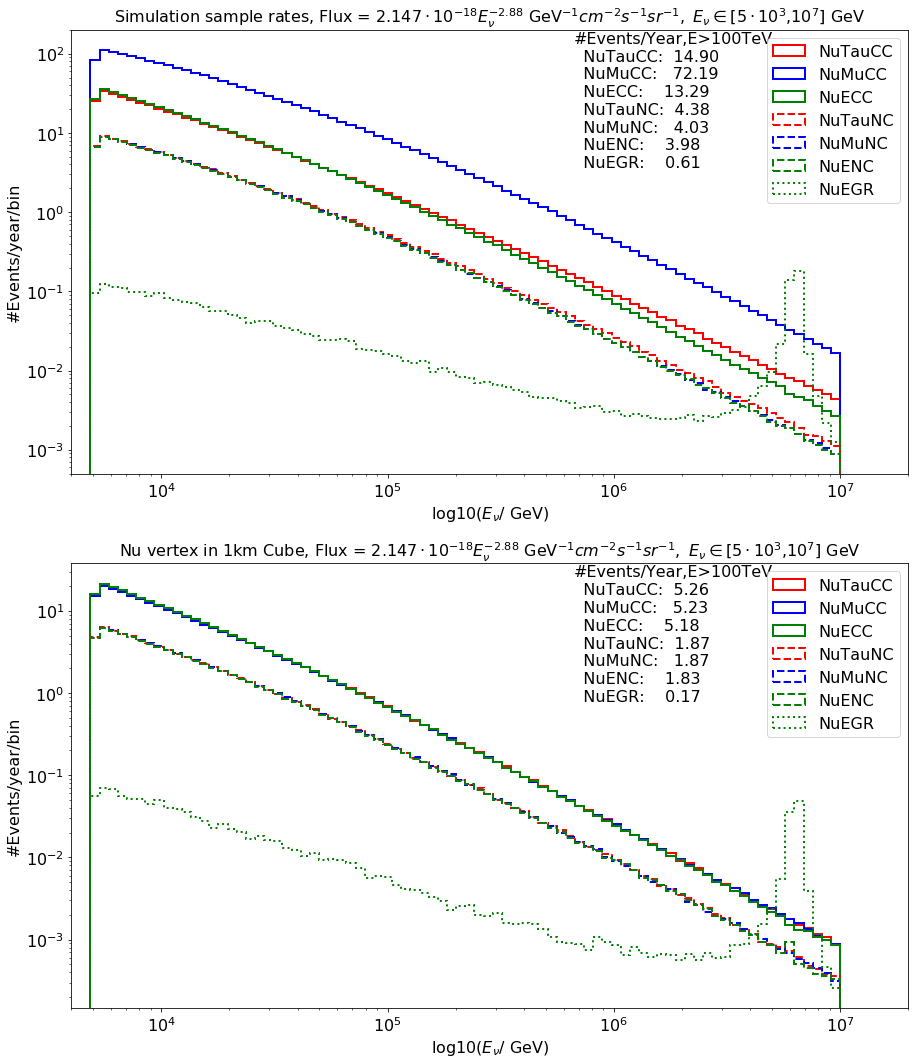

In [74]:
fig = plt.figure(figsize=(15, 18),facecolor = "w")
ax = fig.add_subplot(211)
plt.rcParams.update({'font.size': 16})
bins = np.logspace(3, 7, 100)

plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([4000,20000000])

ax.set_title(r'Simulation sample rates, Flux = $2.147\cdot10^{-18}E^{-2.88}_{\nu}$ GeV$^{-1}cm^{-2}s^{-1}sr^{-1},\ E_{\nu}\in[5\cdot10^{3}$,$10^{7}]$ GeV', fontsize = 16)
ax.text(0.6,0.97,'#Events/Year,E>100TeV', transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.93,'  NuTauCC:  {0:.2f}       '.format(w_te_rate_tc*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.89,'  NuMuCC:   {0:.2f}       '.format(w_te_rate_mc*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.85,'  NuECC:    {0:.2f}       '.format(w_te_rate_ec*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.81,'  NuTauNC:  {0:.2f}       '.format(w_te_rate_tn*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.77,'  NuMuNC:   {0:.2f}       '.format(w_te_rate_mn*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.73,'  NuENC:    {0:.2f}       '.format(w_te_rate_en*livetime), transform=ax.transAxes, color = "black",fontsize=16)
ax.text(0.6,0.69,'  NuEGR:    {0:.2f}       '.format(w_te_rate_eg*livetime), transform=ax.transAxes, color = "black",fontsize=16)

ax.set_xlabel(r'log10($E_{\nu}$/ GeV)', fontsize = 16)                                                              
ax.set_ylabel('#Events/year/bin', fontsize = 16)                                                   
ax.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tc], bins = bins, weights=w_weights_t[tmask_tc]*livetime, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mc], bins = bins, weights=w_weights_m[tmask_mc]*livetime, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_ec], bins = bins, weights=w_weights_e[tmask_ec]*livetime, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tn], bins = bins, weights=w_weights_t[tmask_tn]*livetime, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC")  
ax.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mn], bins = bins, weights=w_weights_m[tmask_mn]*livetime, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC")  
ax.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_en], bins = bins, weights=w_weights_e[tmask_en]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC")  
ax.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_eg], bins = bins, weights=w_weights_e[tmask_eg]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls =":", label = "NuEGR")  
ax.legend()

ax2 = fig.add_subplot(212)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([4000,20000000])

ax2.set_title(r'Nu vertex in 1km Cube, Flux = $2.147\cdot10^{-18}E^{-2.88}_{\nu}$ GeV$^{-1}cm^{-2}s^{-1}sr^{-1},\ E_{\nu}\in[5\cdot10^{3}$,$10^{7}]$ GeV', fontsize = 16)
ax2.text(0.6,0.97,'#Events/Year,E>100TeV', transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.93,'  NuTauCC:  {0:.2f}       '.format(w_wte_rate_tc*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.89,'  NuMuCC:   {0:.2f}       '.format(w_wte_rate_mc*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.85,'  NuECC:    {0:.2f}       '.format(w_wte_rate_ec*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.81,'  NuTauNC:  {0:.2f}       '.format(w_wte_rate_tn*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.77,'  NuMuNC:   {0:.2f}       '.format(w_wte_rate_mn*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.73,'  NuENC:    {0:.2f}       '.format(w_wte_rate_en*livetime), transform=ax2.transAxes, color = "black",fontsize=16)
ax2.text(0.6,0.69,'  NuEGR:    {0:.2f}       '.format(w_wte_rate_eg*livetime), transform=ax2.transAxes, color = "black",fontsize=16)

ax2.set_xlabel(r'log10($E_{\nu}$/ GeV)', fontsize = 16)                                                              
ax2.set_ylabel('#Events/year/bin', fontsize = 16)                                                   
ax2.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tc & w_mask_t], bins = bins, weights=w_weights_t[tmask_tc & w_mask_t]*livetime, histtype = 'step',edgecolor ='r', lw =2, label = "NuTauCC")  
ax2.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mc & w_mask_m], bins = bins, weights=w_weights_m[tmask_mc & w_mask_m]*livetime, histtype = 'step',edgecolor ='b', lw =2, label = "NuMuCC")  
ax2.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_ec & w_mask_e], bins = bins, weights=w_weights_e[tmask_ec & w_mask_e]*livetime, histtype = 'step',edgecolor ='g', lw =2, label = "NuECC")  
ax2.hist(weights_t['weight']['PrimaryNeutrinoEnergy'][tmask_tn & w_mask_t], bins = bins, weights=w_weights_t[tmask_tn & w_mask_t]*livetime, histtype = 'step',edgecolor ='r', lw =2, ls ="--", label = "NuTauNC")  
ax2.hist(weights_m['weight']['PrimaryNeutrinoEnergy'][tmask_mn & w_mask_m], bins = bins, weights=w_weights_m[tmask_mn & w_mask_m]*livetime, histtype = 'step',edgecolor ='b', lw =2, ls ="--", label = "NuMuNC")  
ax2.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_en & w_mask_e], bins = bins, weights=w_weights_e[tmask_en & w_mask_e]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls ="--", label = "NuENC")  
ax2.hist(weights_e['weight']['PrimaryNeutrinoEnergy'][tmask_eg & w_mask_e], bins = bins, weights=w_weights_e[tmask_eg & w_mask_e]*livetime, histtype = 'step',edgecolor ='g', lw =2, ls =":", label = "NuEGR")  

ax2.legend()
plt.show()


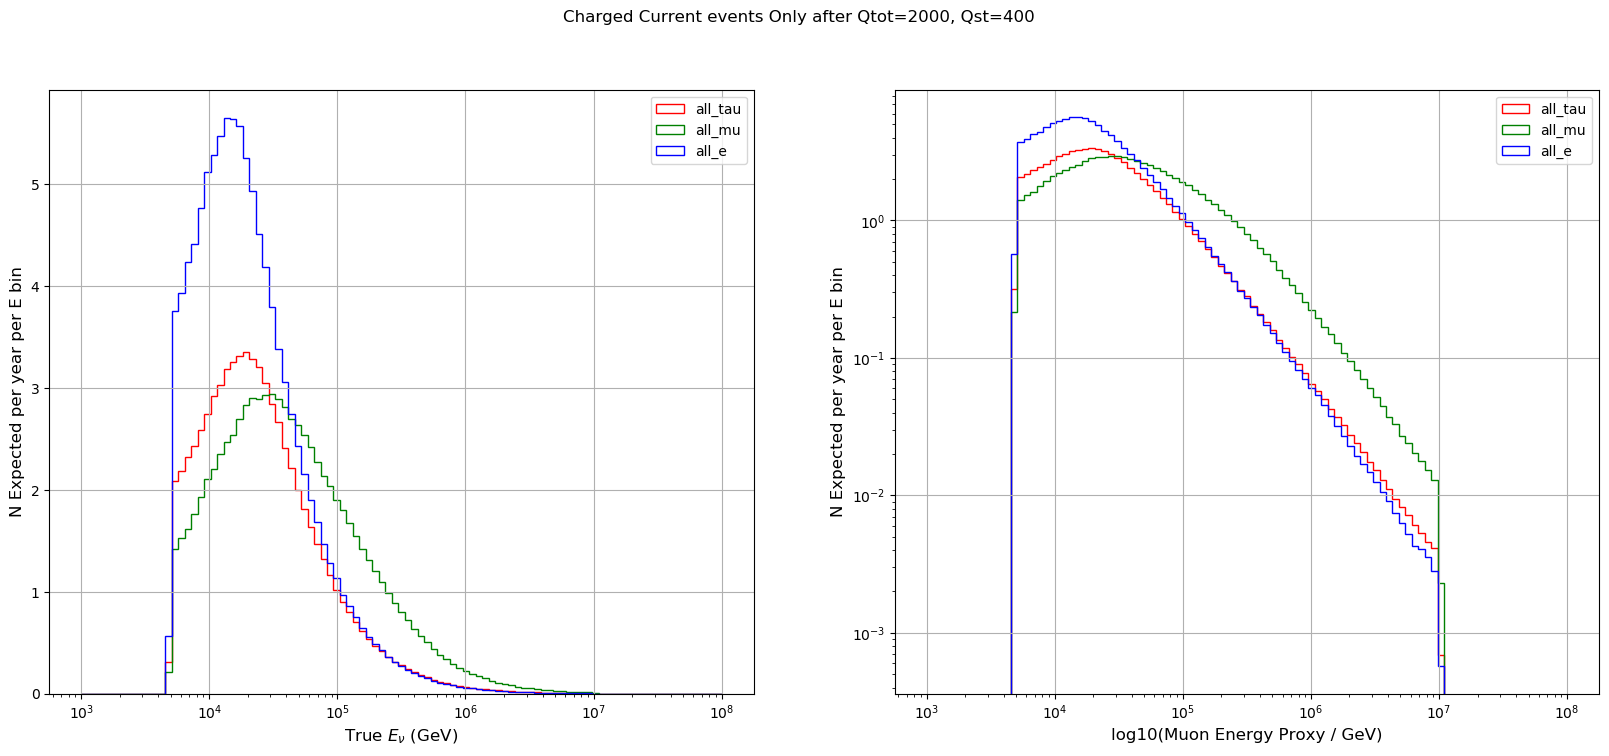

In [10]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Charged Current events Only after Qtot=2000, Qst=400')

ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)

plt.hist((data_tc['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc*livetime, histtype='step', color = 'r', label = "tau")
plt.hist((data_mc['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc*livetime, histtype='step', color = 'g', label = "mu")
plt.hist((data_ec['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec*livetime, histtype='step', color = 'b', label = "e")
plt.hist((data_eg['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec*livetime, histtype='step', color = 'b', label = "GR")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)
plt.legend()

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data_tc['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mc['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_ec['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec*livetime, histtype='step', color = 'b', label = "all_e")
plt.hist((data_eg['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec*livetime, histtype='step', color = 'b', label = "GR")


plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)
plt.legend()

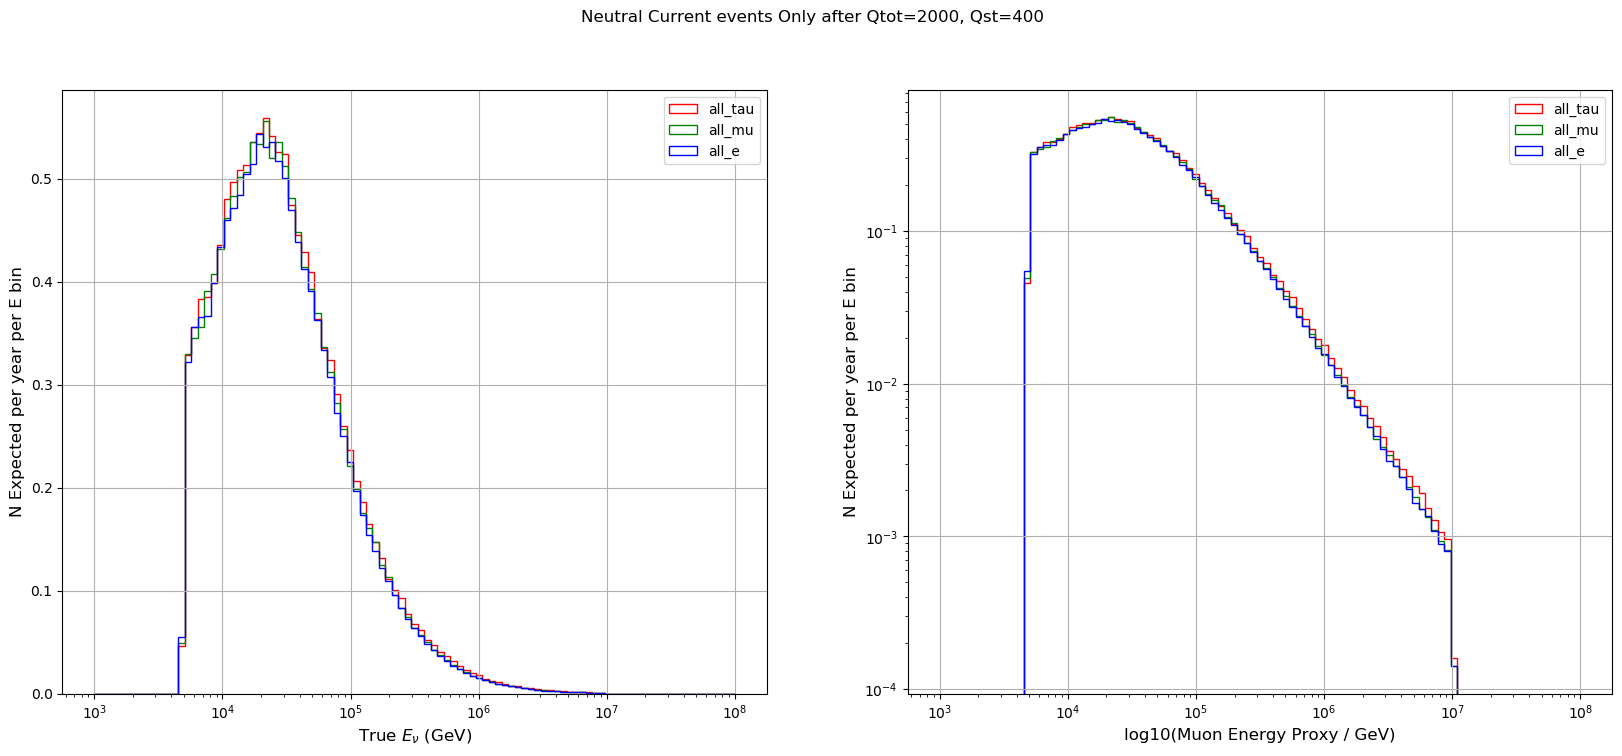

In [11]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Neutral Current events Only after Qtot=2000, Qst=400')

ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)

plt.hist((data_tn['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tn*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mn['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mn*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_en['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_en*livetime, histtype='step', color = 'b', label = "all_e")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)
plt.legend()

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data_tn['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tn*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mn['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mn*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_en['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_en*livetime, histtype='step', color = 'b', label = "all_e")

plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)
plt.legend()


In [22]:
d_mask_tc = FindVertex(data_tc)
d_mask_tn = FindVertex(data_tn)
d_mask_mc = FindVertex(data_mc)
d_mask_mn = FindVertex(data_mn)
d_mask_ec = FindVertex(data_ec)
d_mask_en = FindVertex(data_en)
d_mask_eg = FindVertex(data_eg)

NameError: name 'w_mask_tc' is not defined

In [23]:
print(d_mask_tc.shape,d_mask_tc[0])
print(d_mask_tn.shape,d_mask_tn[0])
print(d_mask_mc.shape,d_mask_mc[0])
print(d_mask_mn.shape,d_mask_mn[0])
print(d_mask_ec.shape,d_mask_ec[0])
print(d_mask_en.shape,d_mask_en[0])
print(d_mask_eg.shape,d_mask_eg[0])

(1486806,) True
(317891,) True
(1795776,) True
(631538,) False
(1633438,) False
(841745,) True
(50726,) True


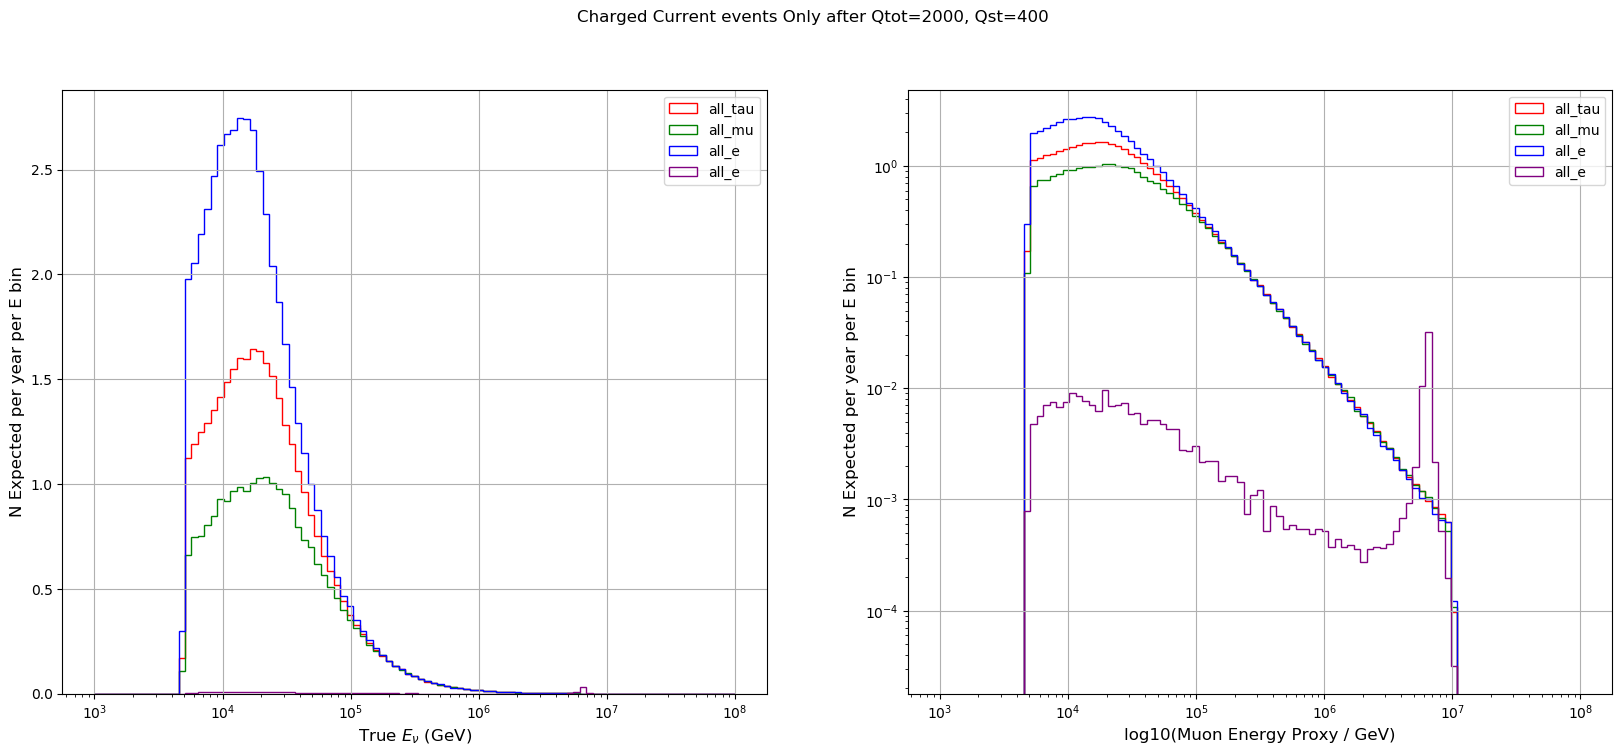

In [25]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Charged Current events Only after Qtot=2000, Qst=400')

ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)

plt.hist((data_tc[d_mask_tc]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc[d_mask_tc]*livetime, histtype='step', color = 'r', label = "tau")
plt.hist((data_mc[d_mask_mc]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc[d_mask_mc]*livetime, histtype='step', color = 'g', label = "mu")
plt.hist((data_ec[d_mask_ec]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec[d_mask_ec]*livetime, histtype='step', color = 'b', label = "e")
plt.hist((data_eg[d_mask_eg]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_eg[d_mask_eg]*livetime, histtype='step', color = 'purple', label = "GR")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)
plt.legend()

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data_tc[d_mask_tc]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc[d_mask_tc]*livetime, histtype='step', color = 'r', label = "tau")
plt.hist((data_mc[d_mask_mc]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc[d_mask_mc]*livetime, histtype='step', color = 'g', label = "mu")
plt.hist((data_ec[d_mask_ec]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec[d_mask_ec]*livetime, histtype='step', color = 'b', label = "e")
plt.hist((data_eg[d_mask_eg]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_eg[d_mask_eg]*livetime, histtype='step', color = 'purple', label = "GR")

plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)
plt.legend()

In [27]:
data_tc_2000 = np.load('/fastio2/dasha/double_pulse/data_NuTauCC_2000.npy', mmap_mode='r')
data_tn_2000 = np.load('/fastio2/dasha/double_pulse/data_NuTauNC_2000.npy', mmap_mode='r')
data_mc_2000 = np.load('/fastio2/dasha/double_pulse/data_NuMuCC_2000.npy', mmap_mode='r')
data_mn_2000 = np.load('/fastio2/dasha/double_pulse/data_NuMuNC_2000.npy', mmap_mode='r')
data_ec_2000 = np.load('/fastio2/dasha/double_pulse/data_NuECC_2000.npy', mmap_mode='r')
data_en_2000 = np.load('/fastio2/dasha/double_pulse/data_NuENC_2000.npy', mmap_mode='r')
data_eg_2000 = np.load('/fastio2/dasha/double_pulse/data_NuEGR_2000.npy', mmap_mode='r')

In [28]:
NFiles_all = 12000
NFiles_cut = 4000
index = -2.88 # power law index to use
livetime = 3.14e7 # ~ seconds per year
flux_at_100tev = 2.147e-18 # flux normalization GeV^-1 cm^-2 s^-1 sr^-1
# flux = Norm*(Energy/100TeV)^(index)
d_flux_tc_2000 = flux_at_100tev*((data_tc_2000['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_tn_2000 = flux_at_100tev*((data_tn_2000['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mc_2000 = flux_at_100tev*((data_mc_2000['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_mn_2000 = flux_at_100tev*((data_mn_2000['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_ec_2000 = flux_at_100tev*((data_ec_2000['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_en_2000 = flux_at_100tev*((data_en_2000['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm
d_flux_eg_2000 = flux_at_100tev*((data_eg_2000['weight']['PrimaryNeutrinoEnergy']/1e5)**index) # same units as norm

d_weights_tc_2000 = data_tc_2000['weight']['OneWeight']*d_flux_tc_2000/(NFiles_all*data_tc_2000["weight"]["NEvents"]) # units of Hz per simulated events event
d_weights_tn_2000 = data_tn_2000['weight']['OneWeight']*d_flux_tn_2000/(NFiles_all*data_tn_2000['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_mc_2000 = data_mc_2000['weight']['OneWeight']*d_flux_mc_2000/(NFiles_cut*data_mc_2000['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_mn_2000 = data_mn_2000['weight']['OneWeight']*d_flux_mn_2000/(NFiles_all*data_mn_2000['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_ec_2000 = data_ec_2000['weight']['OneWeight']*d_flux_ec_2000/(NFiles_cut*data_ec_2000['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_en_2000 = data_en_2000['weight']['OneWeight']*d_flux_en_2000/(NFiles_all*data_en_2000['weight']["NEvents"]) # units of Hz per simulated events event
d_weights_eg_2000 = data_eg_2000['weight']['OneWeight']*d_flux_eg_2000/(NFiles_all*data_eg_2000['weight']["NEvents"]) # units of Hz per simulated events event


d_rate_tc_2000 = np.sum(d_weights_tc_2000) # total rates in Hz
d_rate_tn_2000 = np.sum(d_weights_tn_2000) # total rates in Hz
d_rate_mc_2000 = np.sum(d_weights_mc_2000) # total rates in Hz
d_rate_mn_2000 = np.sum(d_weights_mn_2000) # total rates in Hz
d_rate_ec_2000 = np.sum(d_weights_ec_2000) # total rates in Hz
d_rate_en_2000 = np.sum(d_weights_en_2000) # total rates in Hz
d_rate_eg_2000 = np.sum(d_weights_eg_2000) # total rates in Hz


print("TauCC = {0:.3f}".format(d_rate_tc_2000*livetime))#,w_rate_t*livetime)
print("TauNC = {0:.3f}".format(d_rate_tn_2000*livetime))#,w_rate_t*livetime)
print("MuCC =  {0:.3f}".format(d_rate_mc_2000*livetime))#,w_rate_m*livetime)
print("MuNC =  {0:.3f}".format(d_rate_mn_2000*livetime))#,w_rate_m*livetime)
print("ECC =   {0:.3f}".format(d_rate_ec_2000*livetime))#,w_rate_e*livetime)
print("ENC =   {0:.3f}".format(d_rate_en_2000*livetime))#,w_rate_e*livetime)
print("EGR =   {0:.3f}".format(d_rate_eg_2000*livetime))#,w_rate_e*livetime)


TauCC = 23.607
TauNC = 3.904
MuCC =  18.989
MuNC =  3.845
ECC =   39.192
ENC =   3.788
EGR =   0.387


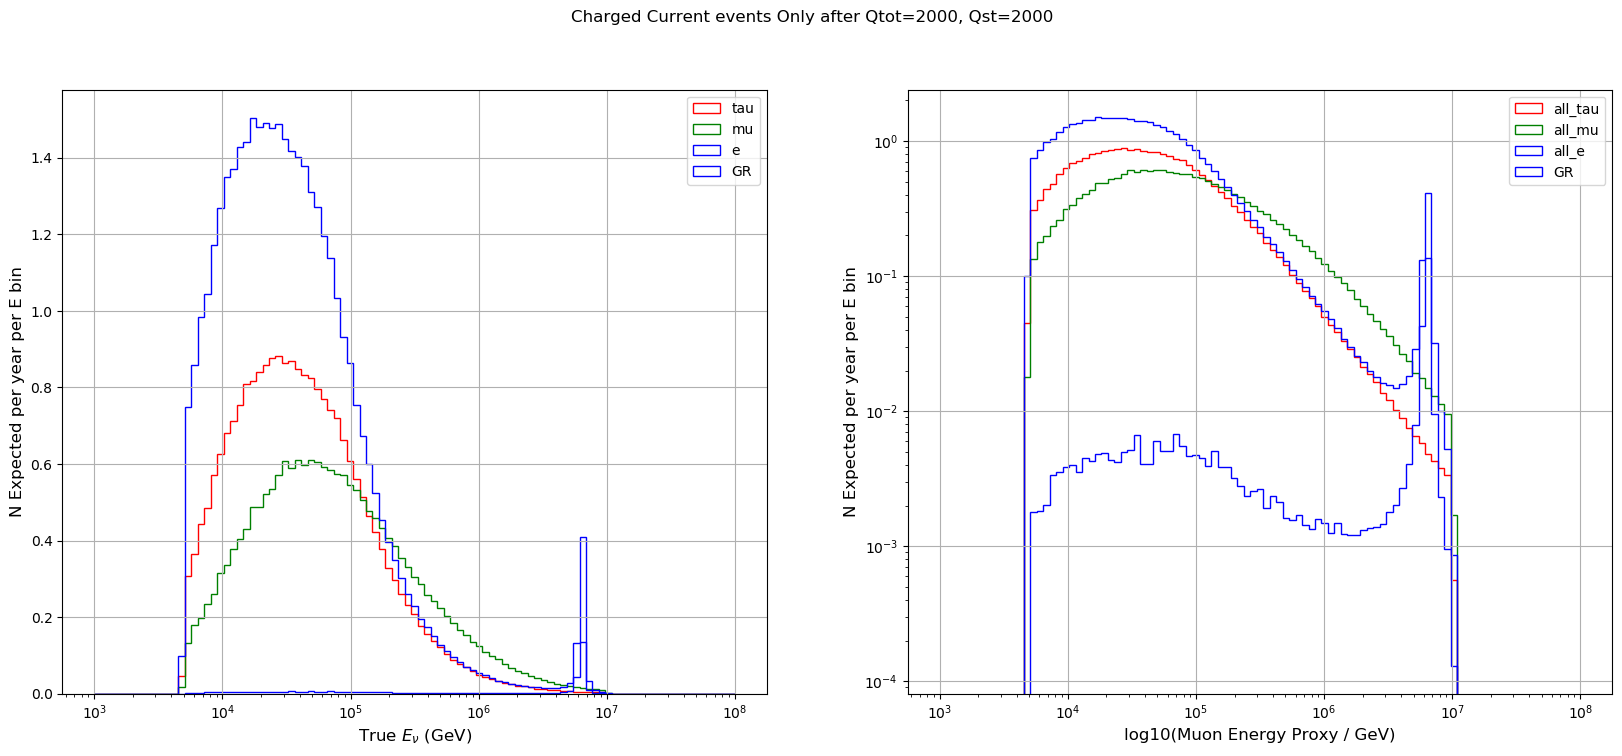

In [30]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Charged Current events Only after Qtot=2000, Qst=2000')

ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)

plt.hist((data_tc_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc_2000*livetime, histtype='step', color = 'r', label = "tau")
plt.hist((data_mc_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc_2000*livetime, histtype='step', color = 'g', label = "mu")
plt.hist((data_ec_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec_2000*livetime, histtype='step', color = 'b', label = "e")
plt.hist((data_eg_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_eg_2000*livetime, histtype='step', color = 'b', label = "GR")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)
plt.legend()

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data_tc_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc_2000*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mc_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc_2000*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_ec_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec_2000*livetime, histtype='step', color = 'b', label = "all_e")
plt.hist((data_eg_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_eg_2000*livetime, histtype='step', color = 'b', label = "GR")


plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)
plt.legend()

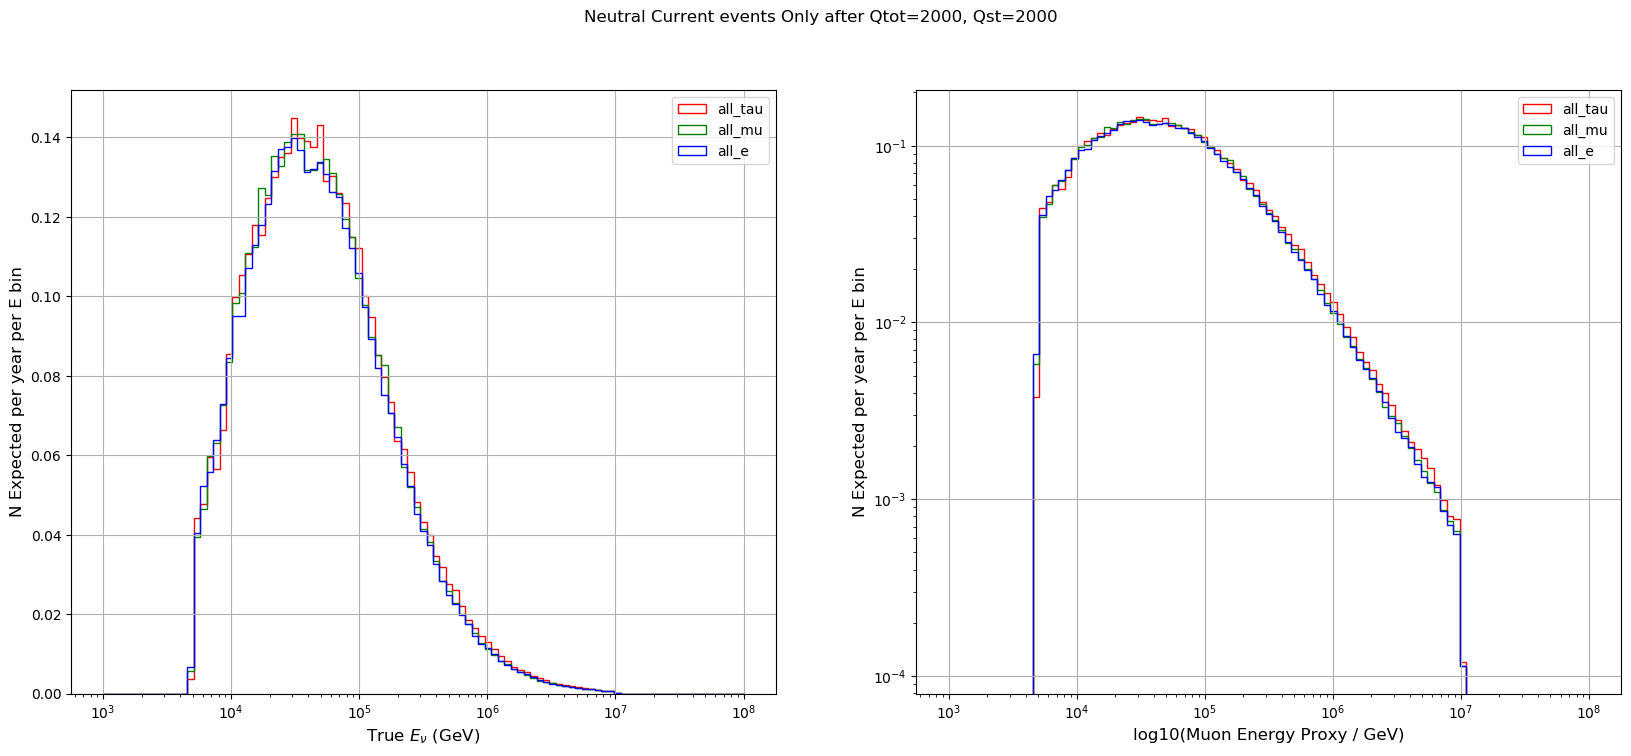

In [32]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Neutral Current events Only after Qtot=2000, Qst=2000')

ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)

plt.hist((data_tn_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tn_2000*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mn_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mn_2000*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_en_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_en_2000*livetime, histtype='step', color = 'b', label = "all_e")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)
plt.legend()

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data_tn_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tn_2000*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mn_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mn_2000*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_en_2000['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_en_2000*livetime, histtype='step', color = 'b', label = "all_e")

plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)
plt.legend()


In [33]:
d_mask_tc_2000 = FindVertex(data_tc_2000)
d_mask_tn_2000 = FindVertex(data_tn_2000)
d_mask_mc_2000 = FindVertex(data_mc_2000)
d_mask_mn_2000 = FindVertex(data_mn_2000)
d_mask_ec_2000 = FindVertex(data_ec_2000)
d_mask_en_2000 = FindVertex(data_en_2000)
d_mask_eg_2000 = FindVertex(data_eg_2000)

In [34]:
print(d_mask_tc_2000.shape,d_mask_tc_2000[0])
print(d_mask_tn_2000.shape,d_mask_tn_2000[0])
print(d_mask_mc_2000.shape,d_mask_mc_2000[0])
print(d_mask_mn_2000.shape,d_mask_mn_2000[0])
print(d_mask_ec_2000.shape,d_mask_ec_2000[0])
print(d_mask_en_2000.shape,d_mask_en_2000[0])
print(d_mask_eg_2000.shape,d_mask_eg_2000[0])

(788435,) True
(157986,) True
(774475,) True
(316041,) False
(947011,) False
(421034,) False
(37436,) True


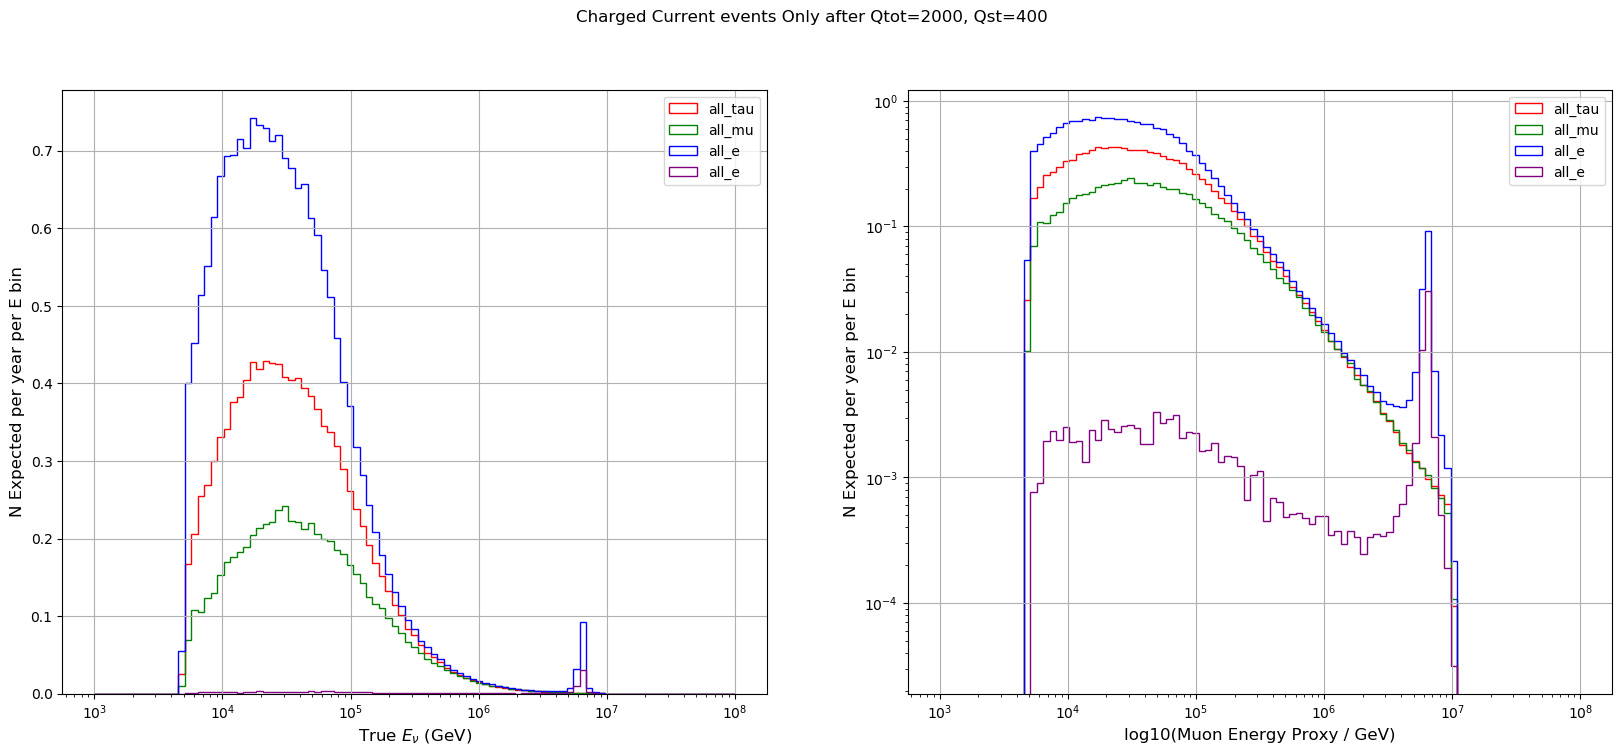

In [35]:
fig = plt.figure(dpi=100, figsize=(20,8))
fig.suptitle('Charged Current events Only after Qtot=2000, Qst=400')

ax=fig.add_subplot(121)
bins = np.logspace(3, 8, 100)

plt.hist((data_tc_2000[d_mask_tc_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc_2000[d_mask_tc_2000]*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mc_2000[d_mask_mc_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc_2000[d_mask_mc_2000]*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_ec_2000[d_mask_ec_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec_2000[d_mask_ec_2000]*livetime, histtype='step', color = 'b', label = "all_e")
plt.hist((data_eg_2000[d_mask_eg_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_eg_2000[d_mask_eg_2000]*livetime, histtype='step', color = 'purple', label = "all_e")

plt.grid(True)
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel(r'True $E_{\nu}$ (GeV)', size=12)
plt.legend()

ax=fig.add_subplot(122)
#bins = np.linspace(1, 8, 5*7+1)
plt.hist((data_tc_2000[d_mask_tc_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_tc_2000[d_mask_tc_2000]*livetime, histtype='step', color = 'r', label = "all_tau")
plt.hist((data_mc_2000[d_mask_mc_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_mc_2000[d_mask_mc_2000]*livetime, histtype='step', color = 'g', label = "all_mu")
plt.hist((data_ec_2000[d_mask_ec_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_ec_2000[d_mask_ec_2000]*livetime, histtype='step', color = 'b', label = "all_e")
plt.hist((data_eg_2000[d_mask_eg_2000]['weight']['PrimaryNeutrinoEnergy']), bins=bins,weights=d_weights_eg_2000[d_mask_eg_2000]*livetime, histtype='step', color = 'purple', label = "all_e")

plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('N Expected per year per E bin', size=12)
plt.xlabel('log10(Muon Energy Proxy / GeV)', size=12)
plt.legend()